<a href="https://colab.research.google.com/github/Erman4u/IDS-Machine-Learning/blob/main/NSL-KDD/NSL-KDD-Klasifikasi-Multi-No-SMOTETomek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset NSL-KDD
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/kdd_train.csv')
# Melihat beberapa baris data

print(train_data.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


#EDA

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train_data.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
type = train_data['labels'].unique()
type

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
type = type[1:]
type

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'],
      dtype=object)

In [ ]:
train_data['labels'] = train_data['labels'].replace({
    # Normal
    'normal': 0,

    # DoS
    'back': 1, 'land': 1, 'neptune': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
    'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,

    # Probe

    'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2, 'mscan': 2, 'saint': 2,

    # R2L
    'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3,
    'spy': 3, 'warezclient': 3, 'warezmaster': 3, 'sendmail': 3, 'named': 3,
    'snmpgetattack': 3, 'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'httptunnel': 3,

    # U2R
    'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4, 'ps': 4,
    'sqlattack': 4, 'xterm': 4
})

train_data['labels'] = train_data['labels'].astype(int)


/tmp/ipython-input-10-873530782.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['labels'] = train_data['labels'].replace({


In [ ]:
train_data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


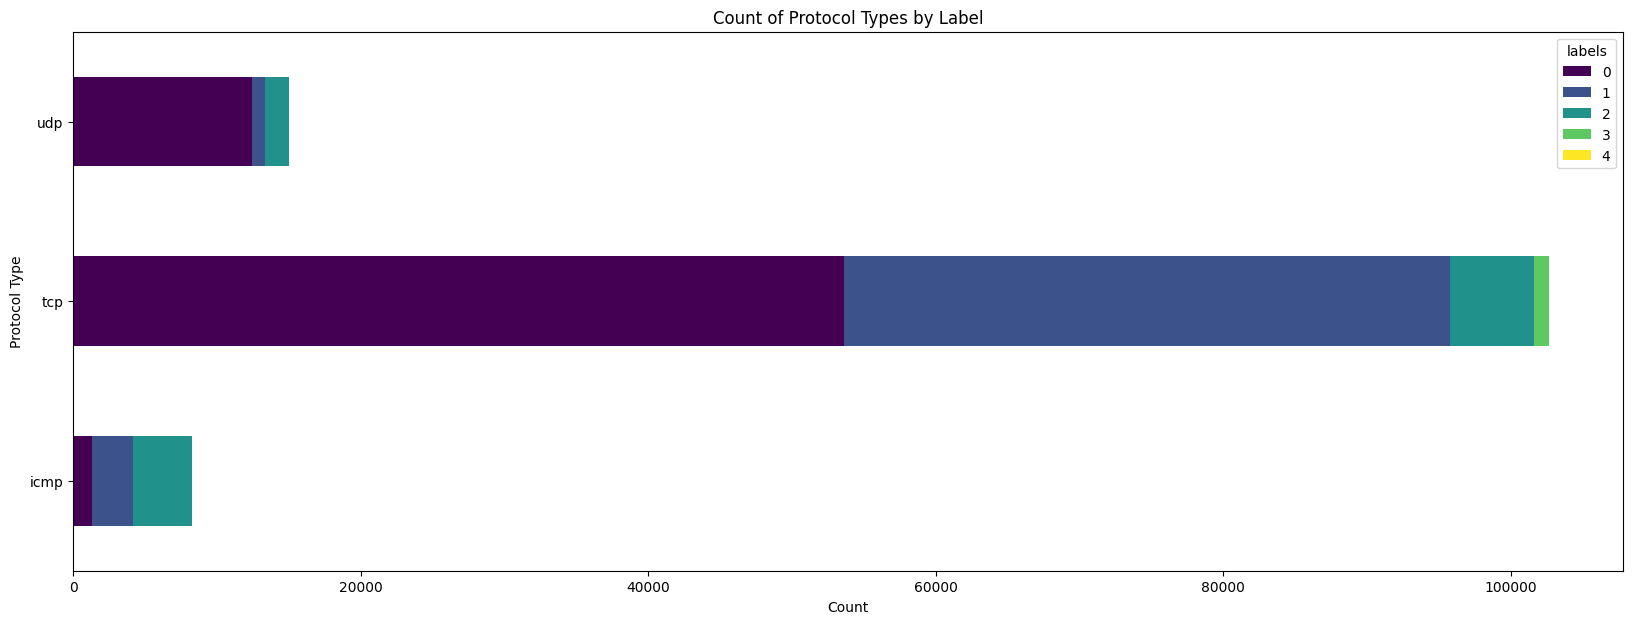

In [ ]:
count_data = train_data.groupby(['protocol_type', 'labels']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True, figsize=(20,7), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Protocol Type')
plt.title('Count of Protocol Types by Label')
plt.show()


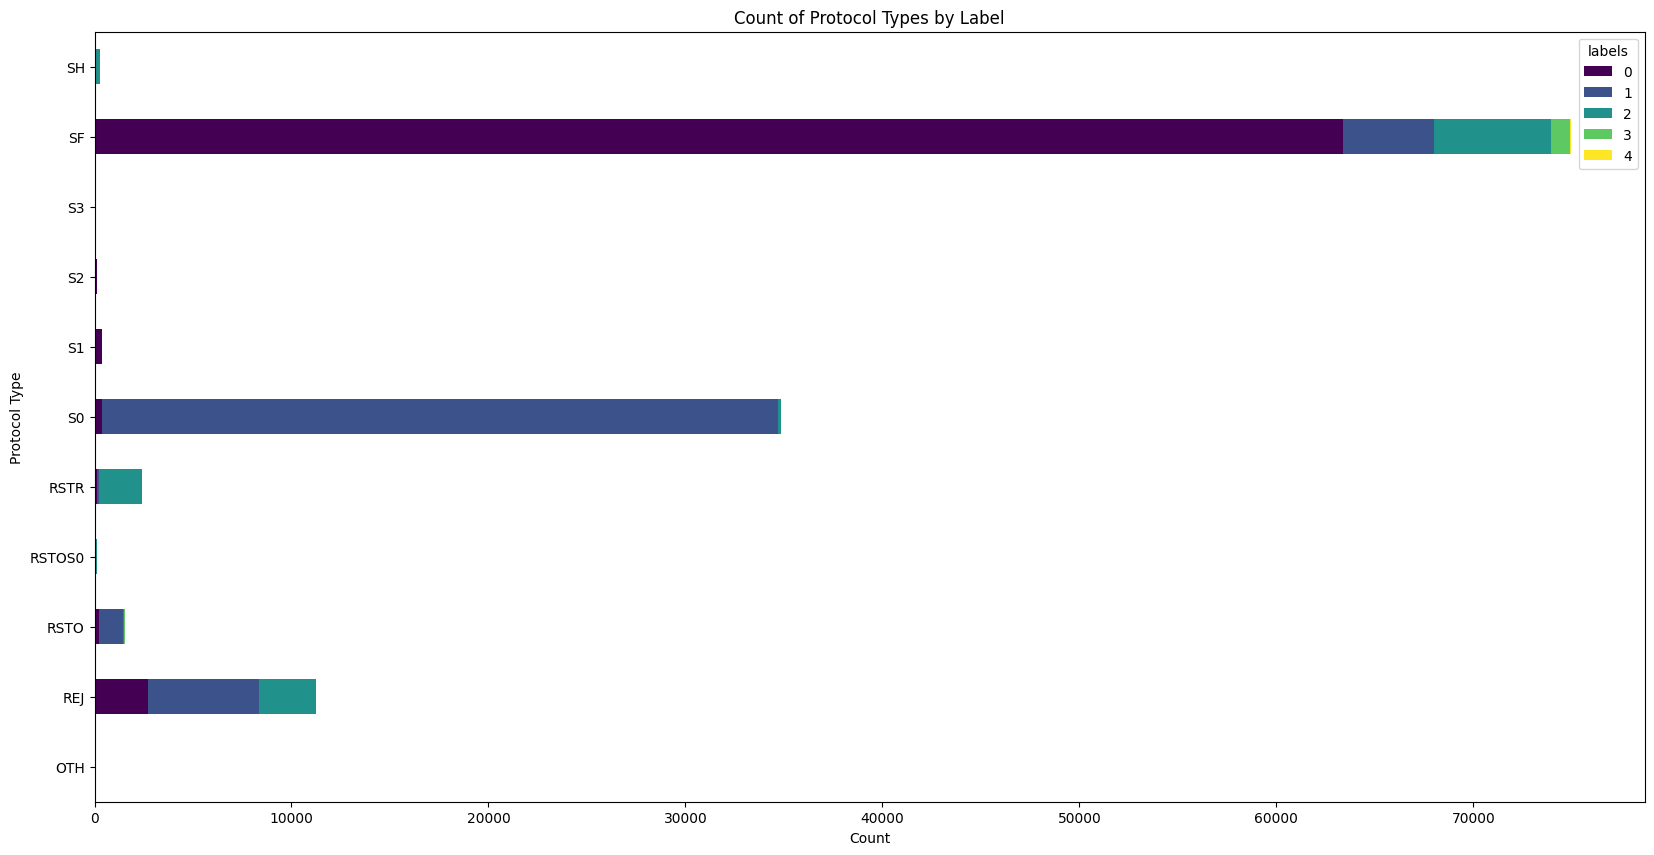

In [ ]:
count_data = train_data.groupby(['flag', 'labels']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True, figsize=(20,10), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Protocol Type')
plt.title('Count of Protocol Types by Label')
plt.show()


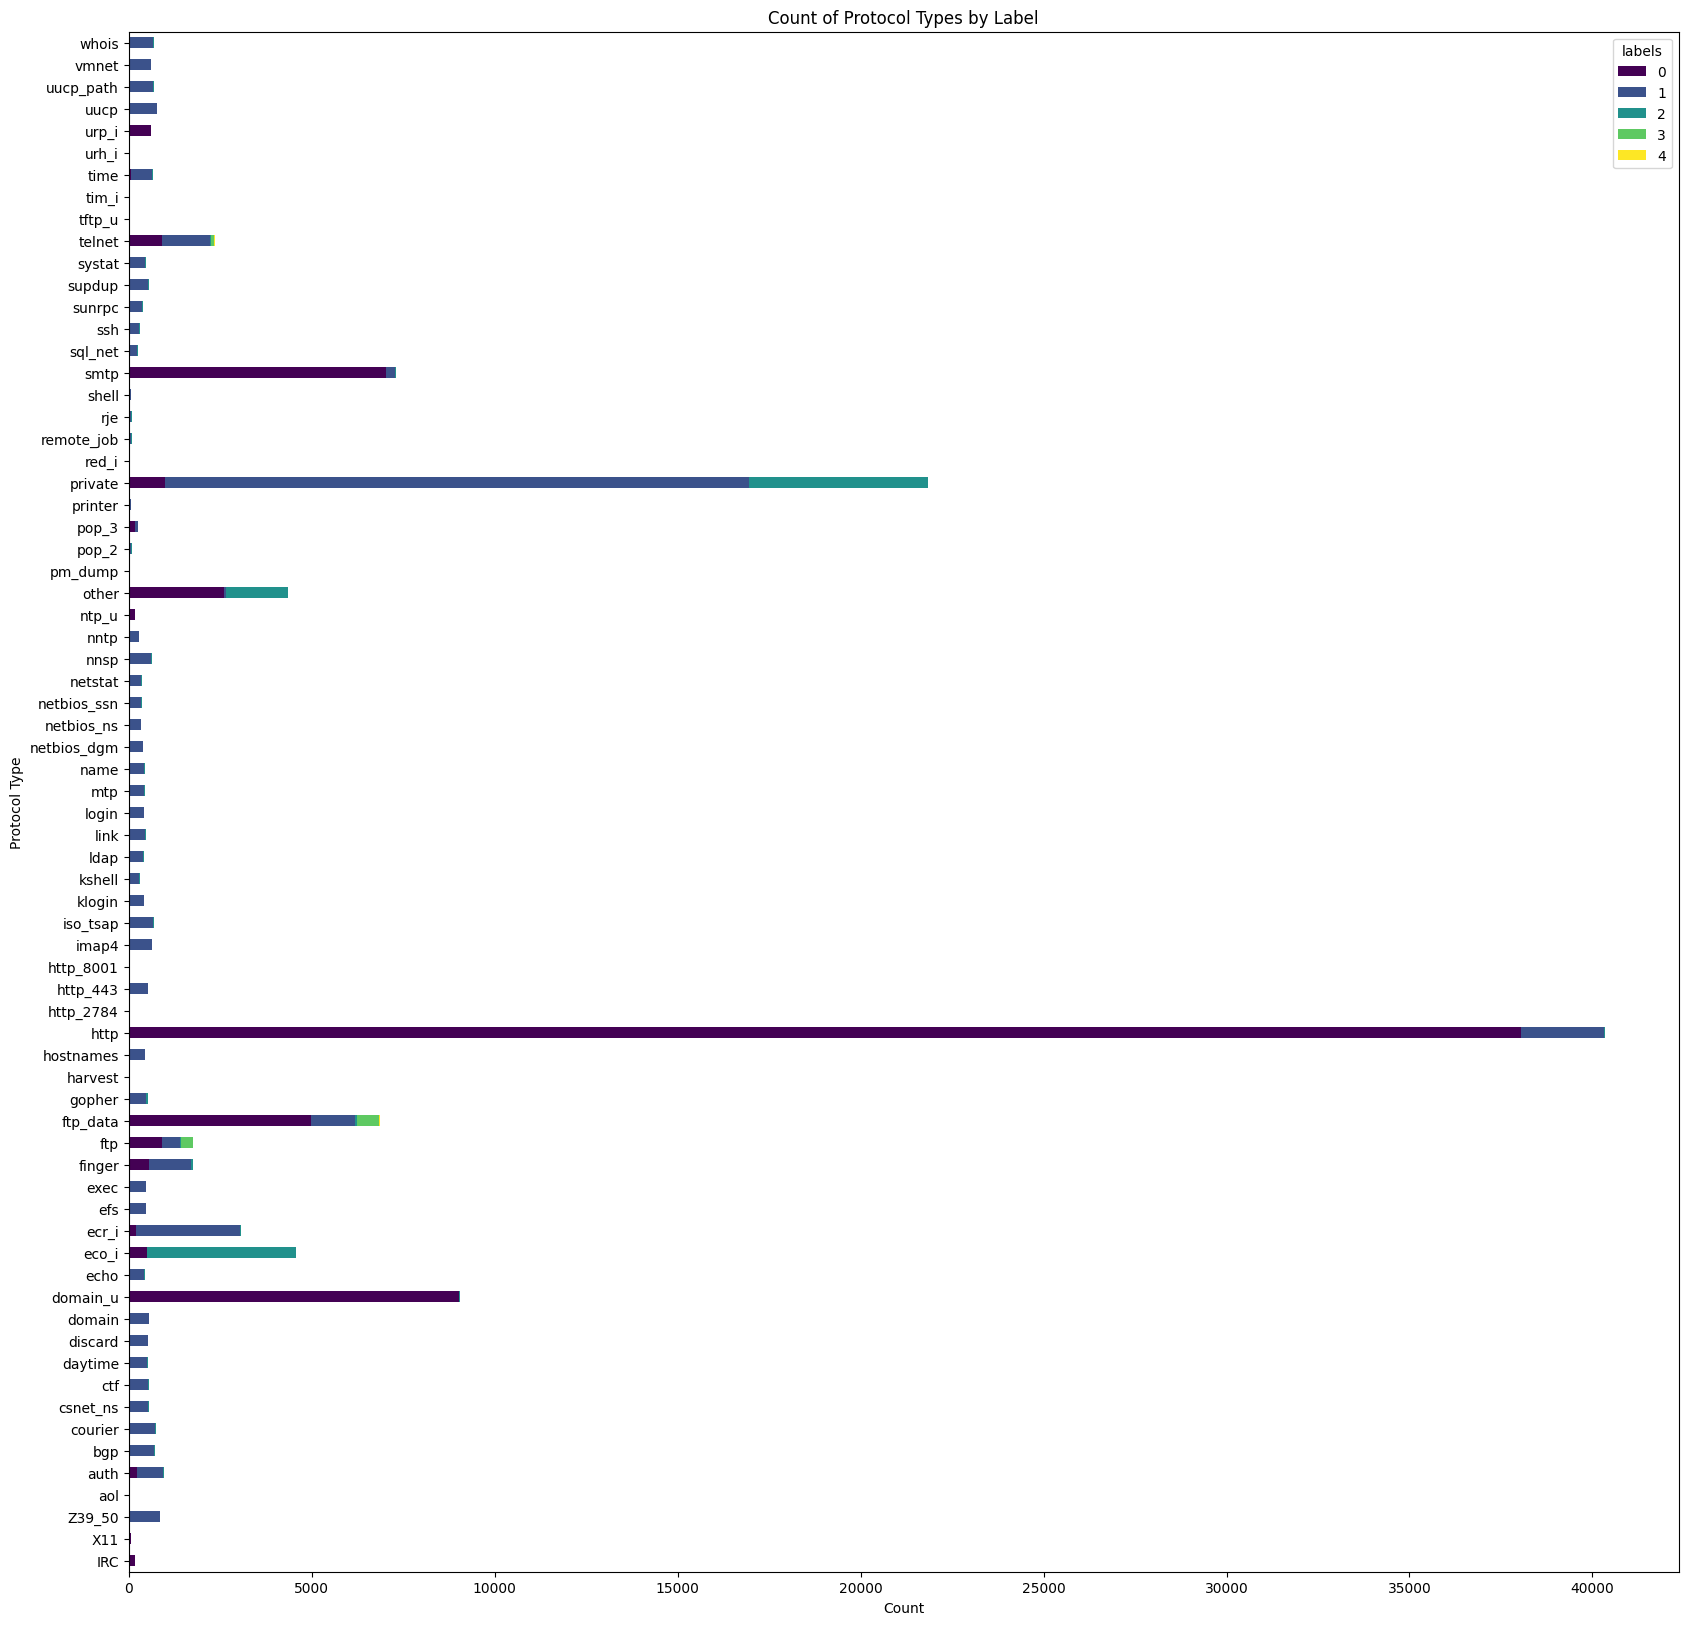

In [ ]:
count_data = train_data.groupby(['service', 'labels']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True, figsize=(20,20), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Protocol Type')
plt.title('Count of Protocol Types by Label')
plt.show()


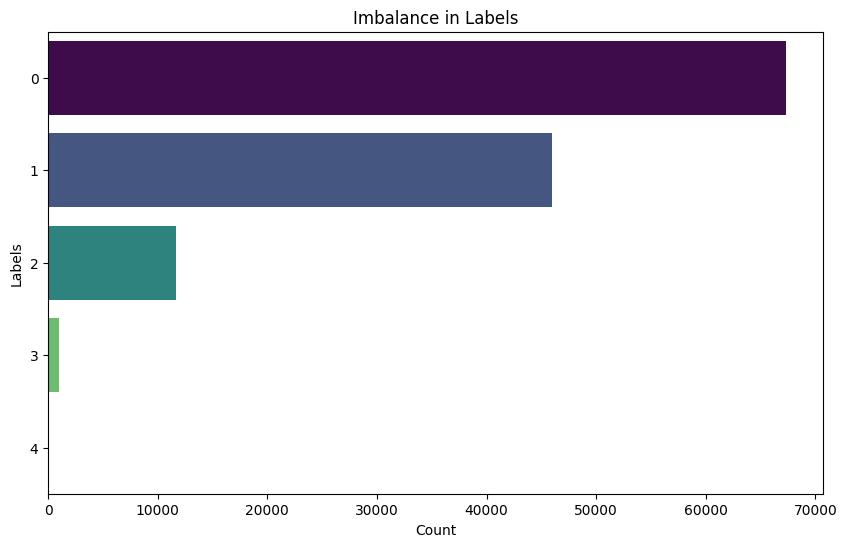

In [ ]:

# Plot imbalance data
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['labels'], hue=train_data['labels'], palette="viridis", legend=False)
plt.title("Imbalance in Labels")
plt.xlabel("Count")
plt.ylabel("Labels")
plt.show()

In [ ]:
c = len(train_data.select_dtypes(include=["number"]).columns)
c

39

In [ ]:
cols = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

protocol_type
service
flag


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['protocol_type','service','flag']

for i in cols:
    en = LabelEncoder()

    train_data[i] = en.fit_transform(train_data[i])

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


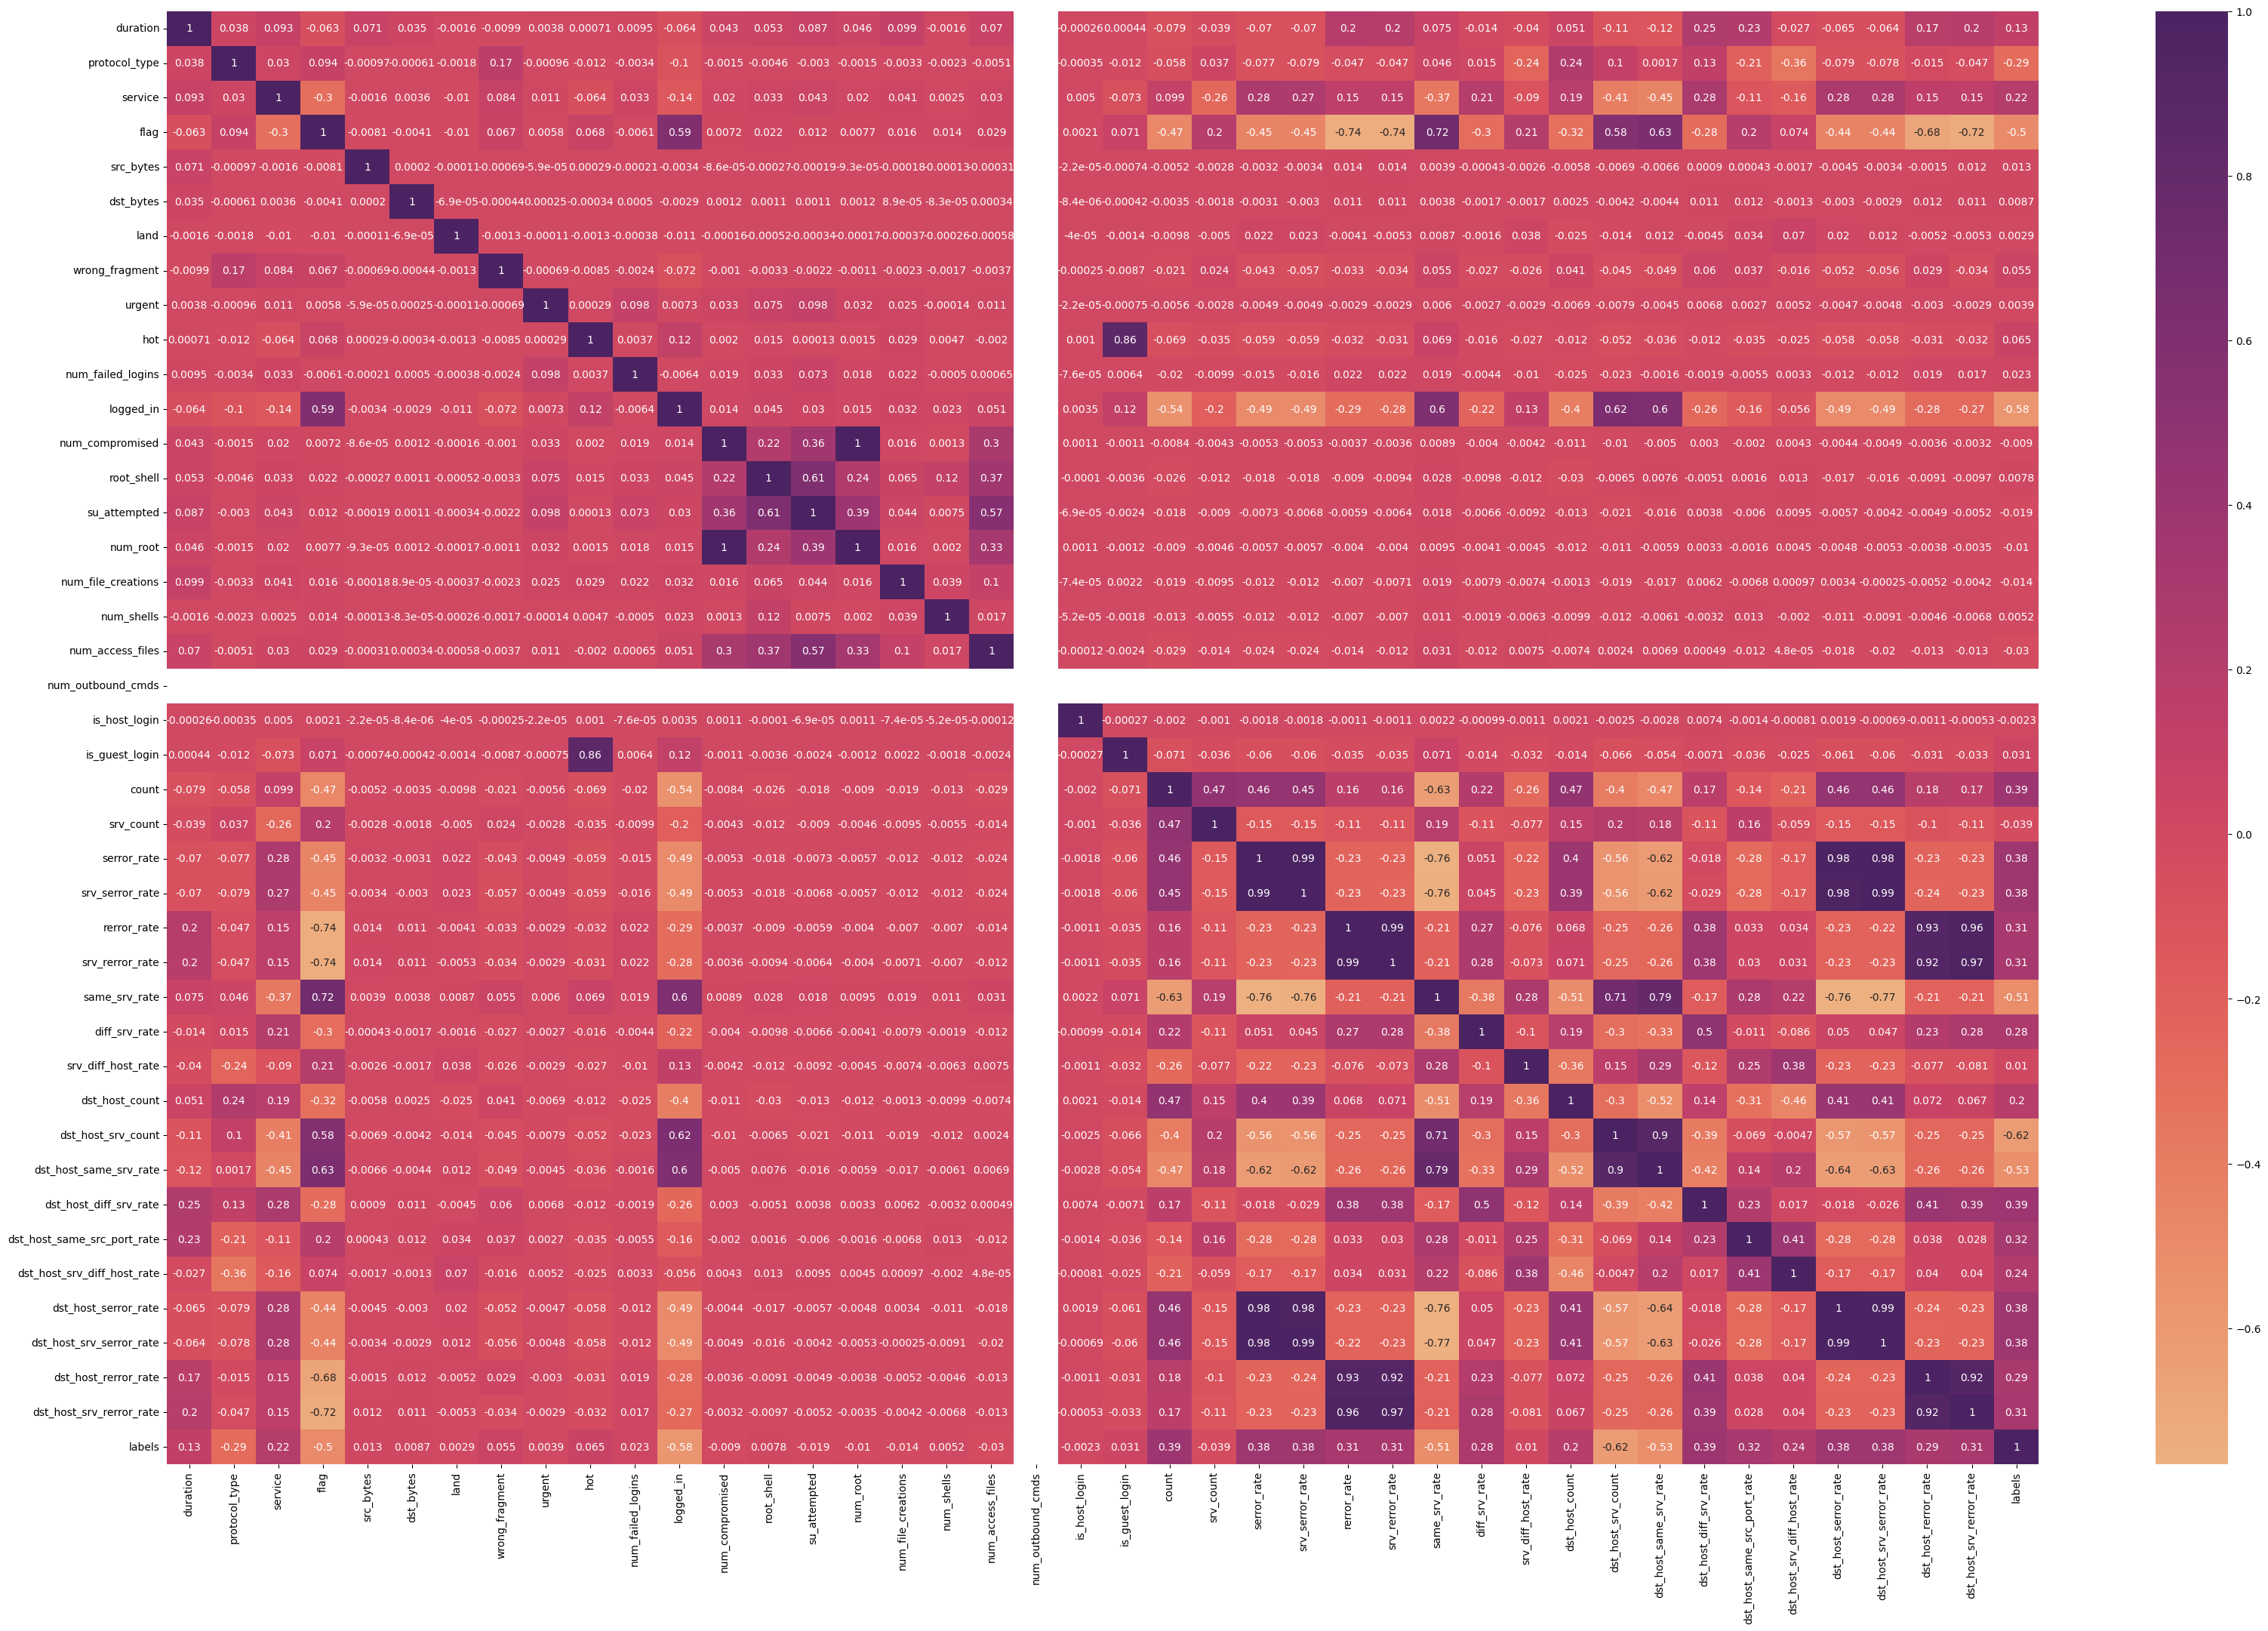

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(train_data.corr(),annot= True,cmap = 'flare')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Misal data Anda dalam dataframe X
correlation_matrix = train_data.corr()  # Default adalah Pearson


In [ ]:
# Create correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
duration,1.000000,0.038241,0.092858,0.063390,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,...,0.109776,0.116005,0.254195,0.228737,0.026669,0.064948,0.064361,0.173815,0.199024,0.129443
protocol_type,0.038241,1.000000,0.029994,0.093668,0.000974,0.000608,0.001757,0.169535,0.000965,0.011857,...,0.103919,0.001702,0.131380,0.209105,0.356183,0.079398,0.077925,0.015434,0.046938,0.287875
service,0.092858,0.029994,1.000000,0.304014,0.001631,0.003596,0.009952,0.084404,0.010980,0.064066,...,0.407696,0.452696,0.284072,0.111163,0.156211,0.281635,0.277594,0.150666,0.148405,0.216020
flag,0.063390,0.093668,0.304014,1.000000,0.008114,0.004096,0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,0.283607,0.195689,0.073773,0.443441,0.443225,0.683310,0.718778,0.501335
src_bytes,0.070737,0.000974,0.001631,0.008114,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,...,0.006861,0.006572,0.000900,0.000431,0.001655,0.004503,0.003397,0.001468,0.012449,0.012981
dst_bytes,0.034878,0.000608,0.003596,0.004096,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,...,0.004224,0.004424,0.011031,0.011747,0.001281,0.003024,0.002944,0.011729,0.011223,0.008651
land,0.001553,0.001757,0.009952,0.010373,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,...,0.014159,0.011597,0.004516,0.033851,0.070474,0.019840,0.012276,0.005222,0.005303,0.002944
wrong_fragment,0.009866,0.169535,0.084404,0.067214,0.000693,0.000440,0.001261,1.000000,0.000692,0.008508,...,0.045240,0.048733,0.059797,0.037177,0.016252,0.051917,0.055917,0.028890,0.033682,0.054795
urgent,0.003830,0.000965,0.010980,0.005811,0.000059,0.000248,0.000109,0.000692,1.000000,0.000293,...,0.007897,0.004489,0.006840,0.002741,0.005176,0.004749,0.004834,0.002999,0.002912,0.003941
hot,0.000705,0.011857,0.064066,0.068437,0.000295,0.000344,0.001340,0.008508,0.000293,1.000000,...,0.051864,0.036293,0.012293,0.034536,0.024715,0.058222,0.058214,0.030555,0.031670,0.065085


In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(train_data.columns.tolist())

columns_to_drop = [
    'num_outbound_cmds',
    'is_host_login',
    'land',
    'urgent',
    'wrong_fragment',
    'num_failed_logins',
    'num_compromised',
    'num_root',
    'num_shells',
    'dst_bytes',
    'hot'
]

td_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

print("\nKolom setelah dihapus:")
print(td_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

Kolom setelah dihapus:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 

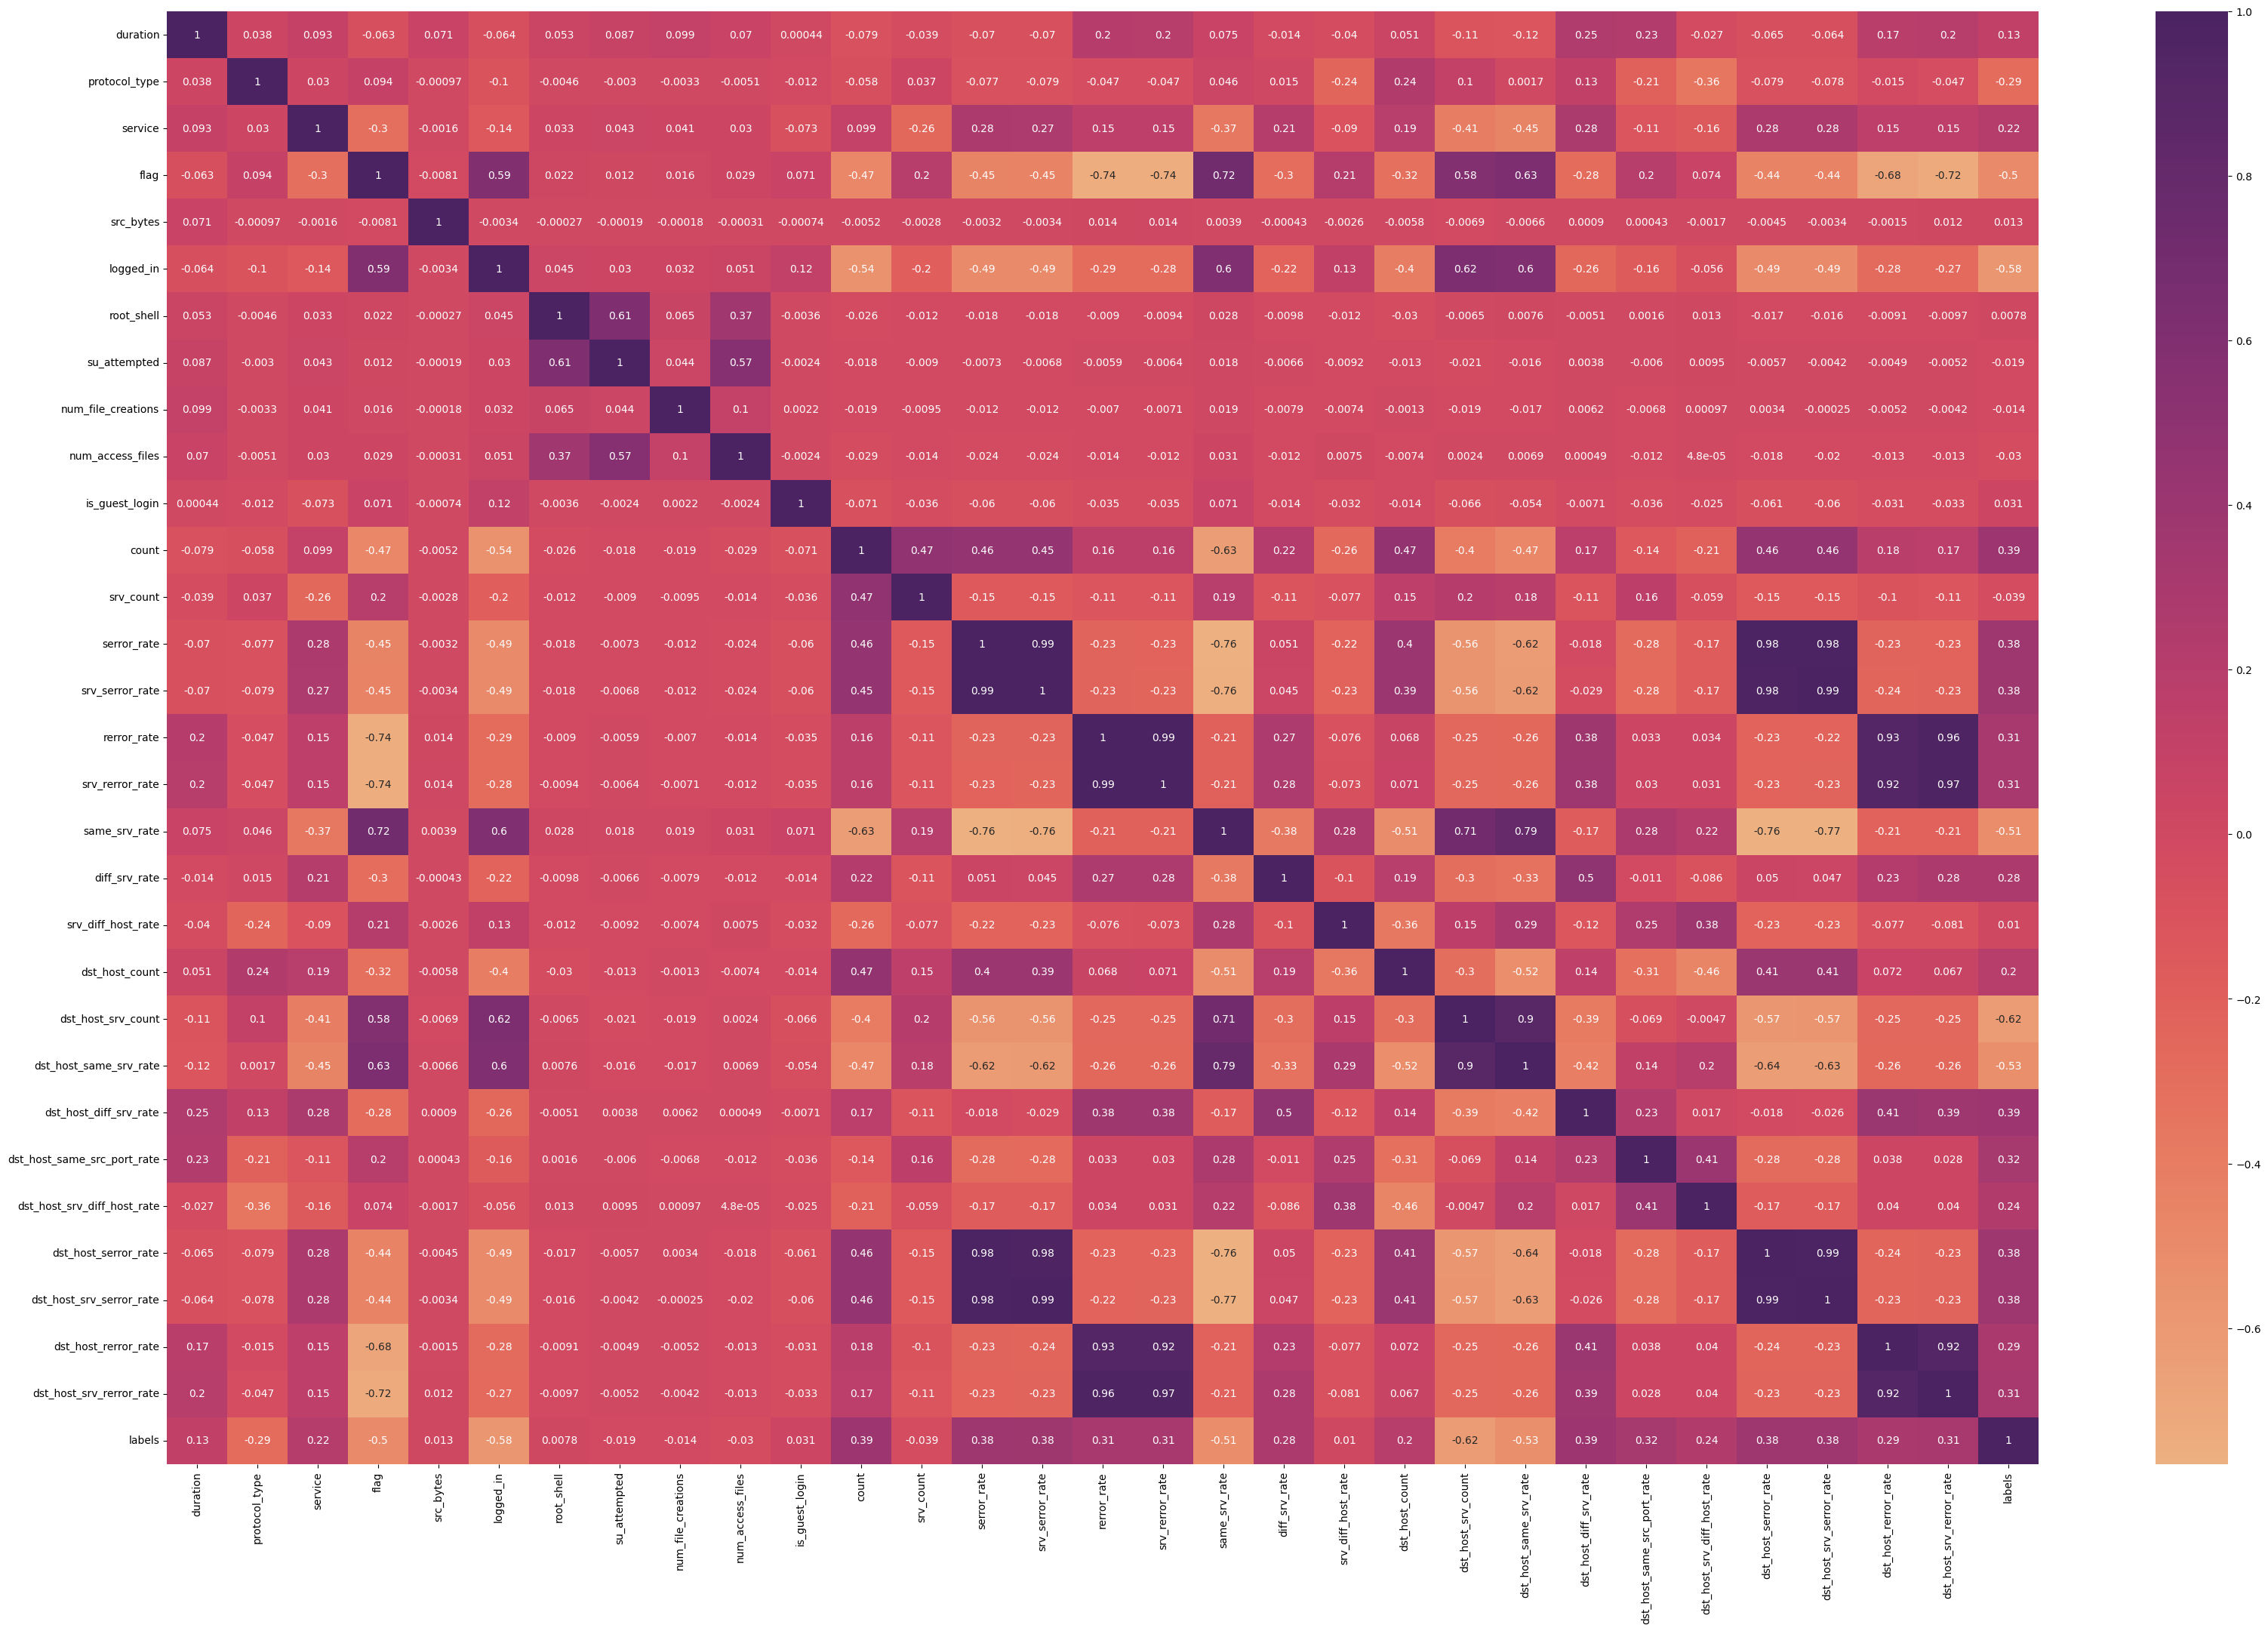

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(td_cleaned.corr(),annot= True,cmap = 'flare')
plt.show()

#Scaling Data

In [ ]:
X_trn = td_cleaned.drop(['labels'] , axis = 1).values
Y_trn = td_cleaned['labels'].values

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

X_trn = scaler.fit_transform(X_trn)

In [ ]:
X_trn.shape


(125973, 30)

In [ ]:
from sklearn.model_selection import train_test_split


#BAGI DATA

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size = 0.20)

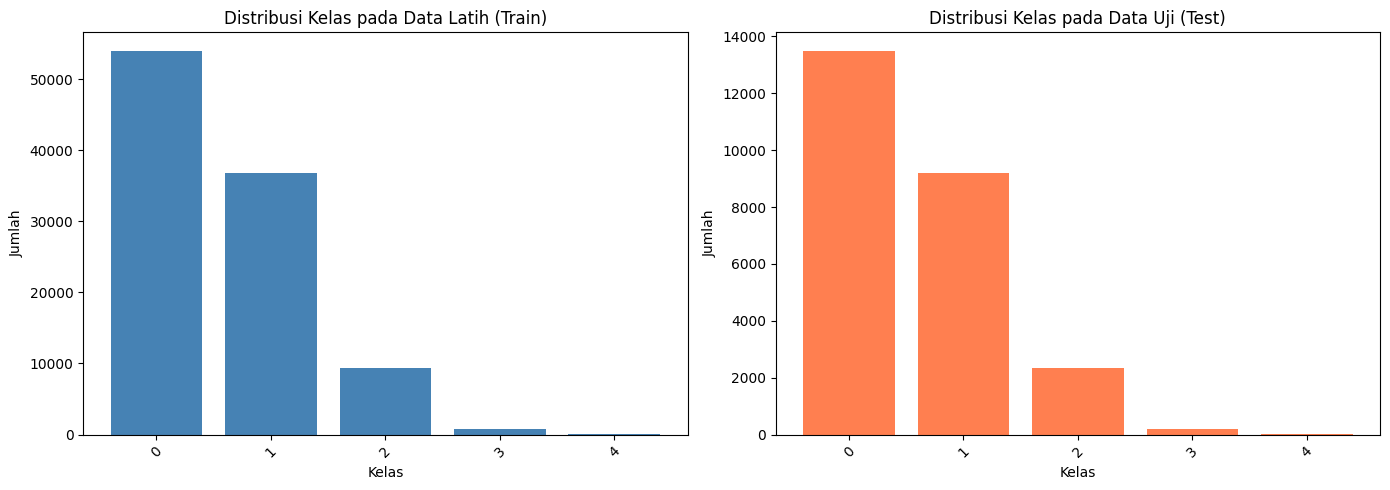

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ubah ke Series
y_trn_series = pd.Series(y_trn)
y_tst_series = pd.Series(y_tst)

# Hitung distribusi label
train_counts = y_trn_series.value_counts().sort_index()
test_counts = y_tst_series.value_counts().sort_index()

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualisasi distribusi data latih
axes[0].bar(train_counts.index.astype(str), train_counts.values, color='steelblue')
axes[0].set_title('Distribusi Kelas pada Data Latih (Train)')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi data uji
axes[1].bar(test_counts.index.astype(str), test_counts.values, color='coral')
axes[1].set_title('Distribusi Kelas pada Data Uji (Test)')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
x_trn.shape


(100778, 30)

In [ ]:
x_tst.shape


(25195, 30)

In [ ]:
y_trn.shape


(100778,)

#TRAINING DATA TANPA CV

=== Logistic Regression ===
Training Accuracy: 0.9448490742027029
Testing Accuracy: 0.943242706886287
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     13469
           1       0.97      0.95      0.96      9185
           2       0.87      0.84      0.86      2335
           3       0.64      0.46      0.53       195
           4       0.57      0.36      0.44        11

    accuracy                           0.94     25195
   macro avg       0.80      0.71      0.75     25195
weighted avg       0.94      0.94      0.94     25195



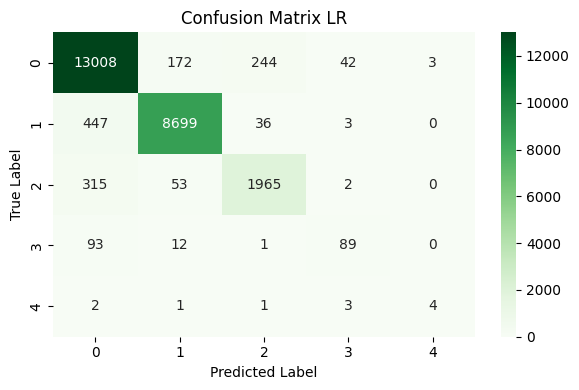

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression(max_iter=1000)
LR.fit(x_trn, y_trn)

y_train_predlr = LR.predict(x_trn)
y_test_predlr = LR.predict(x_tst)

print("=== Logistic Regression ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predlr))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predlr))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlr))
# Confusion Matrix
cmlr = metrics.confusion_matrix(y_tst, y_test_predlr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


=== Random Forest ===
Training Accuracy: 0.9999702315981662
Testing Accuracy: 0.9987695971422902
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00      9185
           2       1.00      1.00      1.00      2335
           3       0.98      0.97      0.98       195
           4       1.00      0.45      0.62        11

    accuracy                           1.00     25195
   macro avg       1.00      0.88      0.92     25195
weighted avg       1.00      1.00      1.00     25195



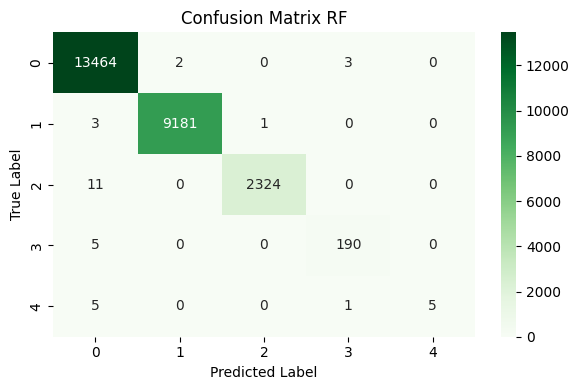

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF = RandomForestClassifier()
RF.fit(x_trn, y_trn)

y_train_predrf = RF.predict(x_trn)
y_test_predrf = RF.predict(x_tst)

print("=== Random Forest ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predrf))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predrf))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrf))
# Confusion Matrix
cmrf = metrics.confusion_matrix(y_tst, y_test_predrf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vector Classifier ===
Training Accuracy: 0.9871598960090496
Testing Accuracy: 0.9861877356618377
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     13469
           1       1.00      0.98      0.99      9185
           2       0.98      0.98      0.98      2335
           3       0.91      0.70      0.79       195
           4       0.75      0.27      0.40        11

    accuracy                           0.99     25195
   macro avg       0.92      0.79      0.83     25195
weighted avg       0.99      0.99      0.99     25195



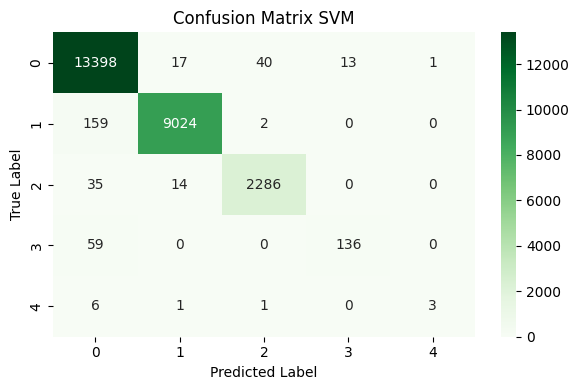

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

SVM = SVC()
SVM.fit(x_trn, y_trn)

y_train_predsv = SVM.predict(x_trn)
y_test_predsv = SVM.predict(x_tst)

print("=== Support Vector Classifier ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predsv))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predsv))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsv))
# Confusion Matrix
cmsv = metrics.confusion_matrix(y_tst, y_test_predsv)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmsv, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes ===
Training Accuracy: 0.5883129254400762
Testing Accuracy: 0.5863068069061321
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.30      0.45     13469
           1       0.64      0.97      0.77      9185
           2       0.61      0.77      0.68      2335
           3       0.15      0.42      0.22       195
           4       0.00      0.82      0.00        11

    accuracy                           0.59     25195
   macro avg       0.47      0.65      0.42     25195
weighted avg       0.80      0.59      0.59     25195



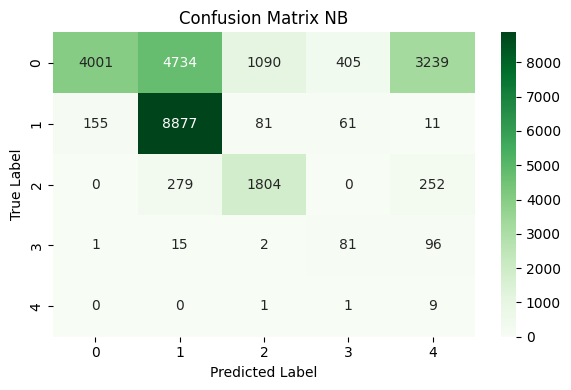

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB = GaussianNB()
NB.fit(x_trn, y_trn)

y_train_prednb = NB.predict(x_trn)
y_test_prednb = NB.predict(x_tst)

print("=== Naive Bayes ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_prednb))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_prednb))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))

cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== K-Nearest Neighbors ===
Training Accuracy: 0.9963583321756733
Testing Accuracy: 0.9943639611033935
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13469
           1       1.00      1.00      1.00      9185
           2       1.00      0.99      0.99      2335
           3       0.91      0.90      0.90       195
           4       0.67      0.36      0.47        11

    accuracy                           0.99     25195
   macro avg       0.91      0.85      0.87     25195
weighted avg       0.99      0.99      0.99     25195



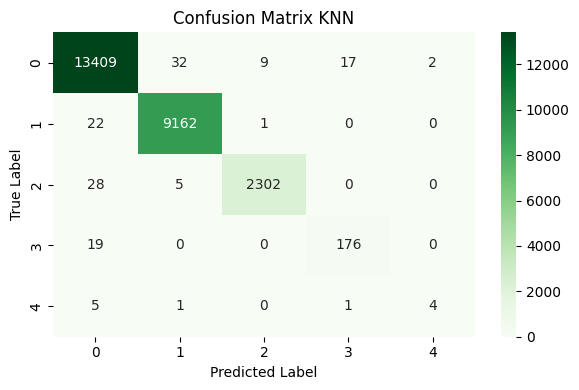

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier()
KNN.fit(x_trn, y_trn)

y_train_predkn = KNN.predict(x_trn)
y_test_predkn = KNN.predict(x_tst)

print("=== K-Nearest Neighbors ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predkn))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predkn))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predkn))
# Confusion Matrix
cmkn = metrics.confusion_matrix(y_tst, y_test_predkn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmkn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

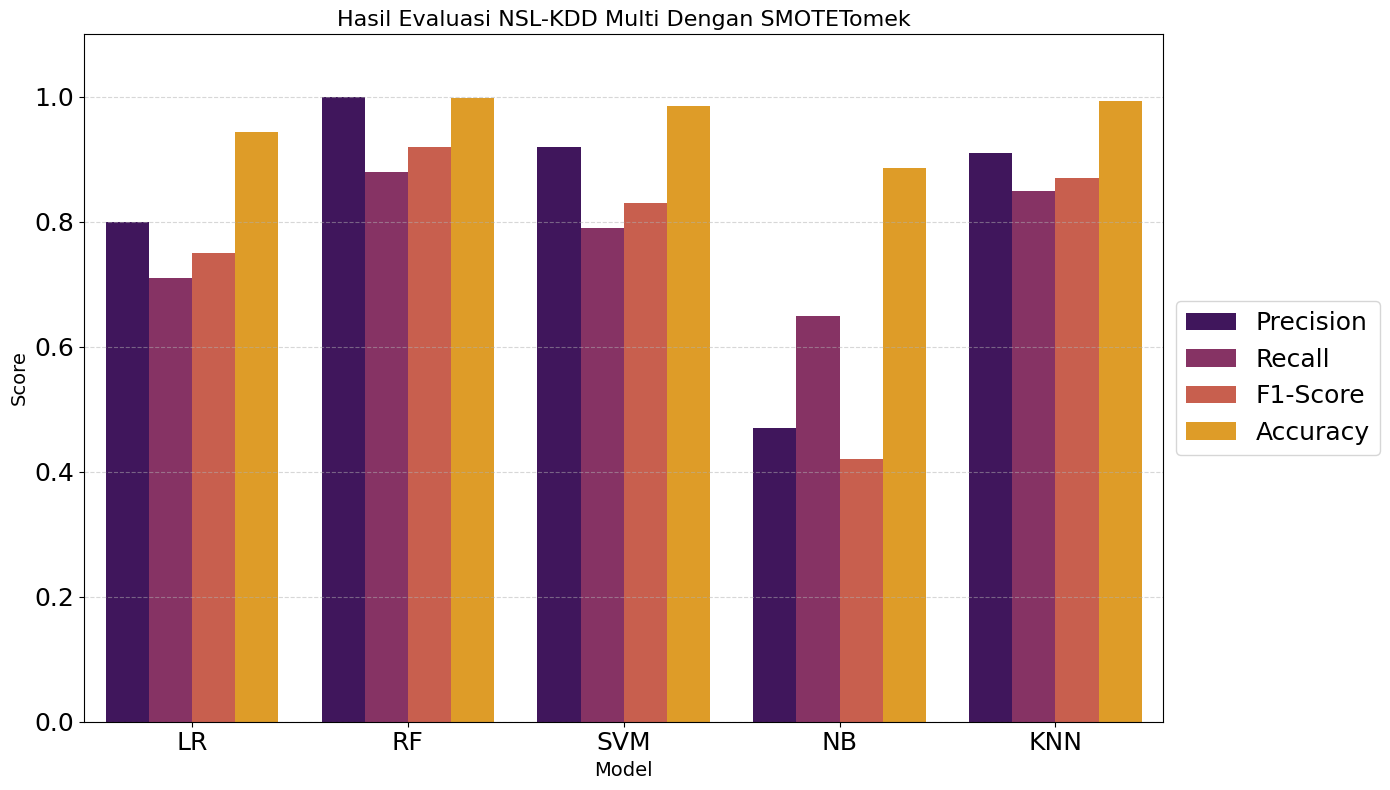

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data macro average dari classification report tanpa GridSearchCV
model_names = ["LR", "RF", "SVM", "NB", "KNN"]
macro_precision = [0.80, 1.00, 0.92, 0.47, 0.91]
macro_recall = [0.71, 0.88, 0.79, 0.65, 0.85]
macro_f1_score = [0.75, 0.92, 0.83, 0.42, 0.87]
test_accuracy = [0.943, 0.998, 0.986, 0.886, 0.994] # Test accuracy from previous output

# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 4,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracy,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Accuracy"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi NSL-KDD Multi Dengan SMOTETomek", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size


plt.tight_layout()
plt.show()

#Menggunakan Gridsearch CV

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.9443
Training Accuracy: 0.9451
Testing Accuracy:  0.9436
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     13469
           1       0.97      0.95      0.96      9185
           2       0.87      0.84      0.86      2335
           3       0.68      0.46      0.55       195
           4       0.50      0.27      0.35        11

    accuracy                           0.94     25195
   macro avg       0.79      0.70      0.73     25195
weighted avg       0.94      0.94      0.94     25195



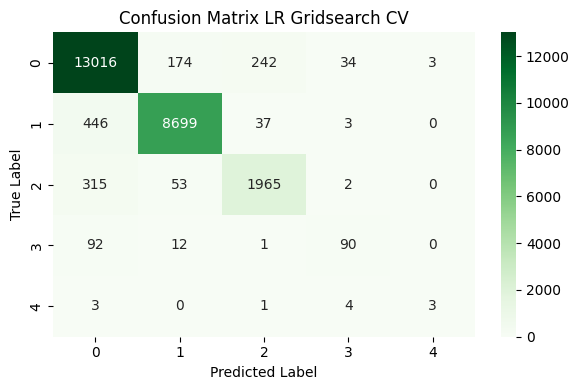

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


lr_model = LogisticRegression(max_iter=1000)
param_gridlr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(lr_model, param_gridlr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_trn, y_trn)

print("Best parameters:", grid_lr.best_params_)
print(f"Best CV score: {grid_lr.best_score_:.4f}")

# Evaluasi pada data training & testing
best_lr = grid_lr.best_estimator_
y_train_predlrm = best_lr.predict(x_trn)
y_test_predlrm = best_lr.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predlrm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predlrm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlrm))
# Confusion Matrix
cmlrm = metrics.confusion_matrix(y_tst, y_test_predlrm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmlrm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Random Forest...
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.9985
=== Random Forest ===
Training Accuracy: 0.9999
Testing Accuracy:  0.9988
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00      9185
           2       1.00      1.00      1.00      2335
           3       0.98      0.97      0.97       195
           4       1.00      0.64      0.78        11

    accuracy                           1.00     25195
   macro avg       1.00      0.92      0.95     25195
weighted avg       1.00      1.00      1.00     25195



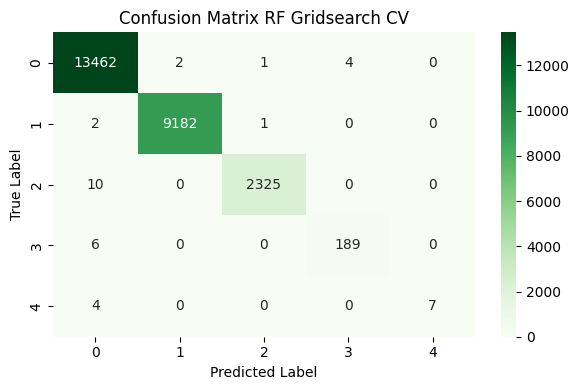

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Random Forest...")

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_gridrfm = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

grid_rf = GridSearchCV(rf_model, param_gridrfm, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_trn, y_trn)

print("Best parameters:", grid_rf.best_params_)
print(f"Best CV score: {grid_rf.best_score_:.4f}")

# Evaluasi pada data training & testing
best_rf = grid_rf.best_estimator_
y_train_predrfm = best_rf.predict(x_trn)
y_test_predrfm = best_rf.predict(x_tst)

print("=== Random Forest ===")
print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predrfm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predrfm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrfm))
# Confusion Matrix
cmrfm = metrics.confusion_matrix(y_tst, y_test_predrfm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmrfm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Support Vector Machine...
Best parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.9296
Training Accuracy: 0.9314
Testing Accuracy:  0.9290
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     13469
           1       0.99      0.95      0.97      9185
           2       0.77      0.97      0.86      2335
           3       0.30      0.93      0.46       195
           4       0.05      0.73      0.09        11

    accuracy                           0.93     25195
   macro avg       0.61      0.90      0.66     25195
weighted avg       0.95      0.93      0.94     25195



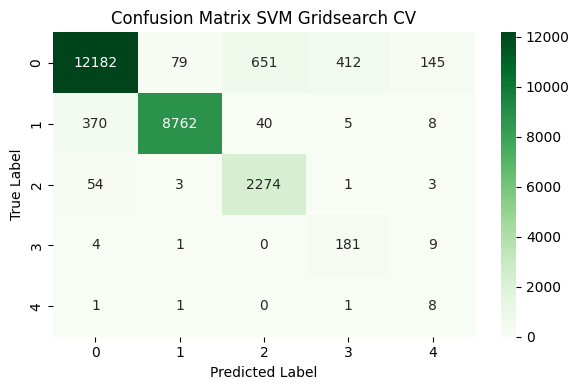

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Support Vector Machine...")

svm_model = SVC()
param_gridsvm = {
    'C': [0.1, 1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(svm_model, param_gridsvm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(x_trn, y_trn)

print("Best parameters:", grid_svm.best_params_)
print(f"Best CV score: {grid_svm.best_score_:.4f}")

# Evaluasi pada data training & testing
best_svm = grid_svm.best_estimator_
y_train_predsvm = best_svm.predict(x_trn)
y_test_predsvm = best_svm.predict(x_tst)


print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predsvm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predsvm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsvm))
# Confusion Matrix
cmsvm = metrics.confusion_matrix(y_tst, y_test_predsvm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Naive Bayes...
Best parameters: {'var_smoothing': 1e-06}
Best CV score: 0.7225
Training Accuracy: 0.7365
Testing Accuracy:  0.7342
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.57      0.72     13469
           1       0.78      0.96      0.86      9185
           2       0.59      0.80      0.68      2335
           3       0.15      0.44      0.23       195
           4       0.00      0.82      0.01        11

    accuracy                           0.73     25195
   macro avg       0.50      0.72      0.50     25195
weighted avg       0.86      0.73      0.77     25195



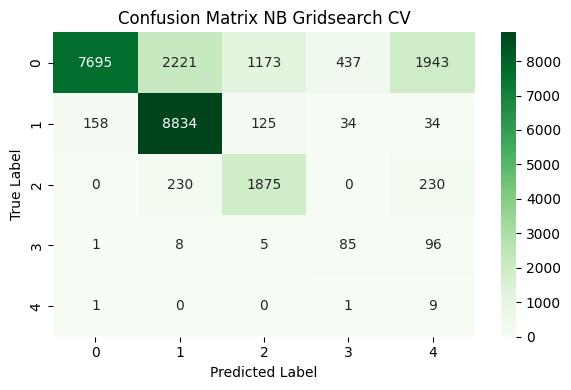

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Naive Bayes...")

nb_model = GaussianNB()
param_gridnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-7]
}

grid_nb = GridSearchCV(nb_model, param_gridnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(x_trn, y_trn)

print("Best parameters:", grid_nb.best_params_)
print(f"Best CV score: {grid_nb.best_score_:.4f}")

# Evaluasi pada data training & testing
best_nb = grid_nb.best_estimator_
y_train_prednb = best_nb.predict(x_trn)
y_test_prednb = best_nb.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_prednb):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_prednb):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))
# Confusion Matrix
cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



🔍 GridSearchCV for K-Nearest Neighbors...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV score: 0.9958
Training Accuracy: 1.0000
Testing Accuracy:  0.9960
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00      9185
           2       1.00      0.99      0.99      2335
           3       0.93      0.93      0.93       195
           4       0.71      0.45      0.56        11

    accuracy                           1.00     25195
   macro avg       0.93      0.87      0.90     25195
weighted avg       1.00      1.00      1.00     25195



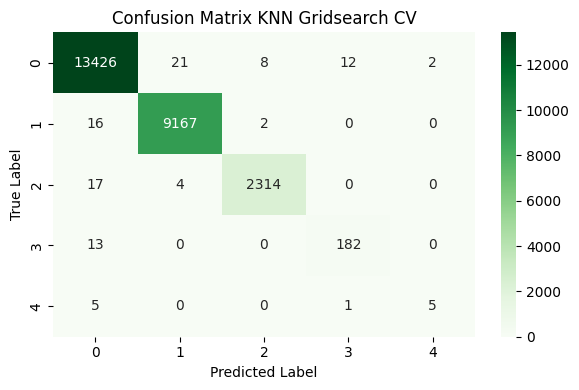

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for K-Nearest Neighbors...")

knn_model = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_model, param_gridknn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(x_trn, y_trn)

print("Best parameters:", grid_knn.best_params_)
print(f"Best CV score: {grid_knn.best_score_:.4f}")

# Evaluasi pada data training & testing
best_knn = grid_knn.best_estimator_
y_train_predknn = best_knn.predict(x_trn)
y_test_predknn = best_knn.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predknn):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predknn):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predknn))
# Confusion Matrix
cmknn = metrics.confusion_matrix(y_tst, y_test_predknn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmknn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

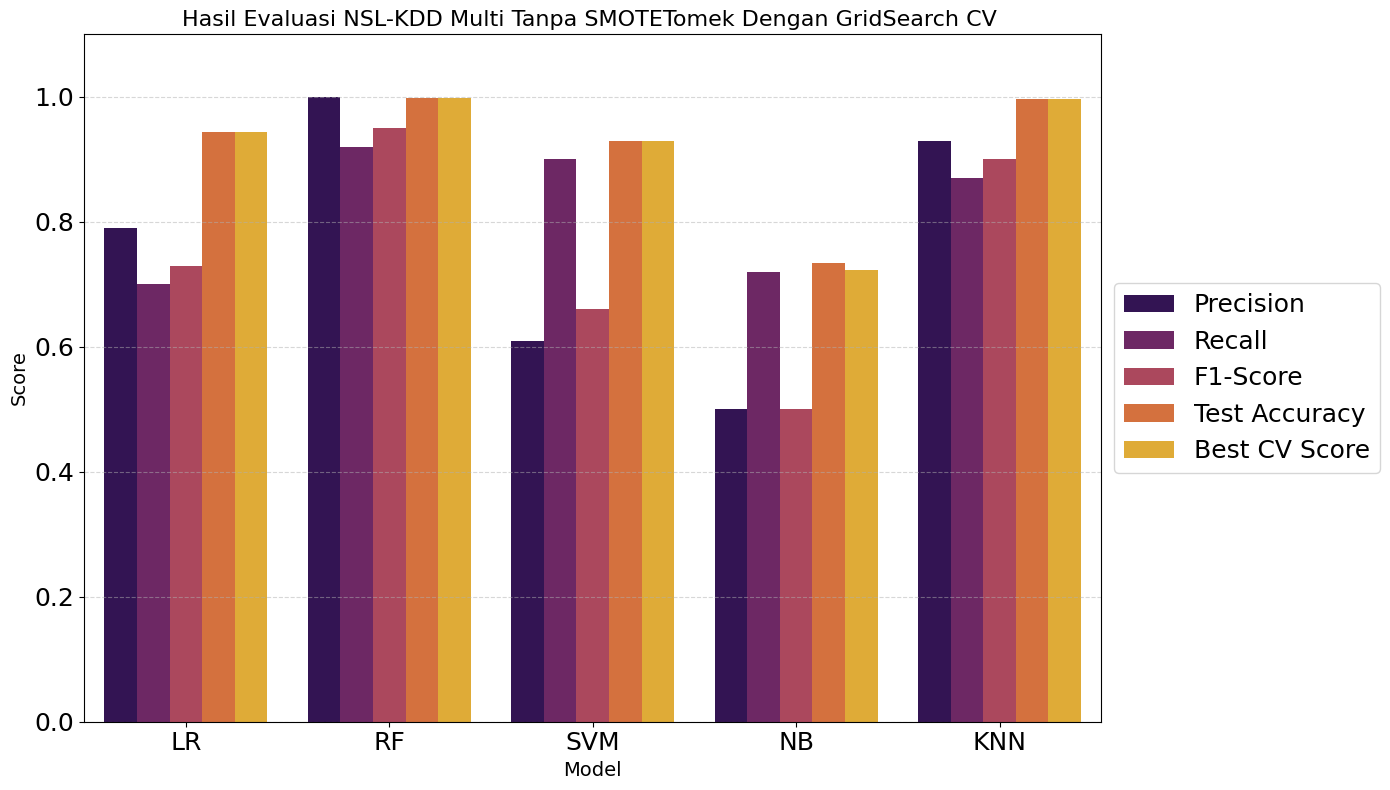

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data dari hasil GridSearchCV
model_names = ["LR", "RF", "SVM", "NB", "KNN"]

# Macro averages from Classification Reports (Testing Data after GridSearchCV)
macro_precision = [0.79, 1.00, 0.61, 0.50, 0.93]
macro_recall = [0.70, 0.92, 0.90, 0.72, 0.87]
macro_f1_score = [0.73, 0.95, 0.66, 0.50, 0.90]

# Test accuracies from GridSearchCV outputs
test_accuracies = [0.9436, 0.9988, 0.9290, 0.7342, 0.9960]

# Best CV scores from GridSearchCV outputs
best_cv_scores = [0.9443, 0.9985, 0.9296, 0.7225, 0.9958]


# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 5,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracies + best_cv_scores,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Test Accuracy"] * len(model_names) + ["Best CV Score"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi NSL-KDD Multi Tanpa SMOTETomek Dengan GridSearch CV ", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Ekspor Impor Model


In [ ]:
# Ambil model terbaik dan prediksi
best_svm = grid_svm.best_estimator_
y_test_pred = best_svm.predict(x_tst)

In [ ]:
best_lr = grid_lr.best_estimator_
y_test_pred = best_lr.predict(x_tst)

In [ ]:
best_rf = grid_rf.best_estimator_
y_test_pred = best_rf.predict(x_tst)

In [ ]:
best_nb = grid_nb.best_estimator_
y_test_pred = best_nb.predict(x_tst)

In [ ]:
best_knn = grid_knn.best_estimator_
y_test_pred = best_knn.predict(x_tst)

In [ ]:
import joblib
joblib.dump(best_svm, "SVM NSL MNS.pkl")
joblib.dump(scaler, 'scaler NSL MNS.pkl')
joblib.dump(best_lr, "LR NSL MNS.pkl"  )
joblib.dump(best_rf, "RF NSL MNS.pkl"  )
joblib.dump(best_nb, "NB NSL MNS.pkl"  )
joblib.dump(best_knn, "KNN NSL MNS.pkl"  )

['KNN NSL MNS.pkl']

In [ ]:
import os
print(os.listdir())

['.config', 'LR NSL MNS.pkl', 'NB NSL MNS.pkl', 'KNN NSL MNS.pkl', 'scaler NSL MNS.pkl', 'drive', 'RF NSL MNS.pkl', 'SVM NSL MNS.pkl', 'sample_data']


In [ ]:
import joblib

model_svm = joblib.load("SVM NSL MNS.pkl")
scaler = joblib.load('scaler NSL MNS.pkl')
model_lr = joblib.load("LR NSL MNS.pkl")
model_rf = joblib.load("RF NSL MNS.pkl")
model_nb = joblib.load("NB NSL MNS.pkl")
model_knn = joblib.load("KNN NSL MNS.pkl")

#Load data Kdd_Test

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Dataset/kdd_test.csv")

#Bersihin Data

In [ ]:
test_data['labels'] = test_data['labels'].replace({
    # Normal
    'normal': 0,

    # DoS
    'back': 1, 'land': 1, 'neptune': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
    'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,

    # Probe

    'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2, 'mscan': 2, 'saint': 2,

    # R2L
    'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3,
    'spy': 3, 'warezclient': 3, 'warezmaster': 3, 'sendmail': 3, 'named': 3,
    'snmpgetattack': 3, 'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'httptunnel': 3,

    # U2R
    'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4, 'ps': 4,
    'sqlattack': 4, 'xterm': 4
}).astype(int) # Added .astype(int) here

In [ ]:
b = len(test_data.select_dtypes(include=["number"]).columns)
b

39

In [ ]:
colst = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

colst = ['protocol_type','service','flag']

for i in colst:
    en = LabelEncoder()

    test_data[i] = en.fit_transform(test_data[i])

In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(test_data.columns.tolist())

columns_to_drops = [
    'num_outbound_cmds',  # Kolom dengan nilai NaN
    'is_host_login',      # Korelasi sangat rendah
    'land',               # Korelasi sangat rendah
    'urgent',             # Korelasi sangat rendah
    'wrong_fragment',     # Korelasi rendah
    'num_failed_logins',  # Korelasi rendah
    'num_compromised',    # Korelasi rendah
    'num_root',           # Korelasi rendah
    'num_shells',         # Korelasi rendah
    'dst_bytes',          # Korelasi rendah
    'hot'                 # Korelasi rendah
]

ts_cleaned = test_data.drop(columns=columns_to_drops, errors='ignore')

print("\nKolom setelah dihapus:")
print(ts_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

Kolom setelah dihapus:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 

In [ ]:
Xs_trn = ts_cleaned.drop(['labels'] , axis = 1).values


In [ ]:
print(Xs_trn.shape)
print(ts_cleaned.shape)


(22544, 30)
(22544, 31)


In [ ]:
ts_cleaned.head()

,duration,protocol_type,service,flag,src_bytes,logged_in,root_shell,su_attempted,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,1,51,9,2429,1,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,0
1,0,2,12,9,45,0,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,0
2,0,2,12,9,45,0,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,0
3,1979,2,41,9,145,0,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,0
4,14462,1,41,4,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,2


#Test Model Pada Data Baru



In [ ]:
from sklearn.preprocessing import StandardScaler


X_train_scaled = scaler.fit_transform(x_trn)
X_test_scaled = scaler.transform(Xs_trn)                # data test

# Kalau pakai label juga:
y_train = y_trn


=== Logistic Regression (Best Model) ===
              precision    recall  f1-score   support

           0       0.80      0.44      0.57     11245
           1       0.57      0.96      0.72      8095
           2       0.08      0.07      0.08      2157
           3       0.19      0.18      0.18      1009
           4       0.00      0.00      0.00        38

    accuracy                           0.58     22544
   macro avg       0.33      0.33      0.31     22544
weighted avg       0.62      0.58      0.56     22544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


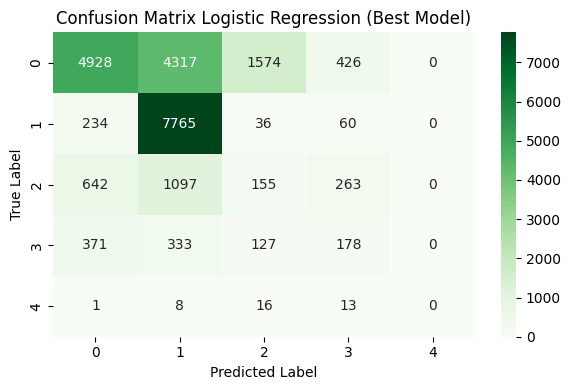

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluasi
print("=== Logistic Regression (Best Model) ===")
print(classification_report(y_test, y_pred_lr))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Logistic Regression (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Random Forest (Best Model) ===
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11245
           1       0.00      0.00      0.00      8095
           2       0.00      0.00      0.00      2157
           3       0.00      0.00      0.00      1009
           4       0.00      0.00      0.00        38

    accuracy                           0.50     22544
   macro avg       0.10      0.20      0.13     22544
weighted avg       0.25      0.50      0.33     22544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


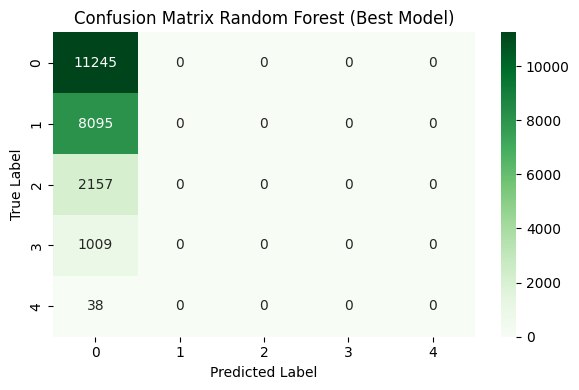

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluasi
print("=== Random Forest (Best Model) ===")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Random Forest (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vectore Machine (Best Model) ===
              precision    recall  f1-score   support

           0       0.82      0.59      0.69     11245
           1       0.68      0.91      0.78      8095
           2       0.00      0.00      0.00      2157
           3       0.05      0.02      0.03      1009
           4       0.00      0.00      0.00        38

    accuracy                           0.62     22544
   macro avg       0.31      0.30      0.30     22544
weighted avg       0.66      0.62      0.62     22544



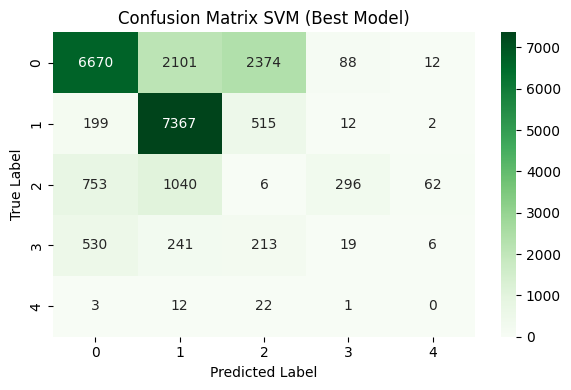

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_svm = model_svm.predict(X_test_scaled)

# Evaluasi
print("=== Support Vectore Machine (Best Model) ===")
print(classification_report(y_test, y_pred_svm))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes (Best Model) ===
              precision    recall  f1-score   support

           0       0.59      0.12      0.19     11245
           1       0.00      0.00      0.00      8095
           2       0.07      0.68      0.13      2157
           3       0.00      0.00      0.00      1009
           4       0.00      0.00      0.00        38

    accuracy                           0.12     22544
   macro avg       0.13      0.16      0.06     22544
weighted avg       0.30      0.12      0.11     22544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


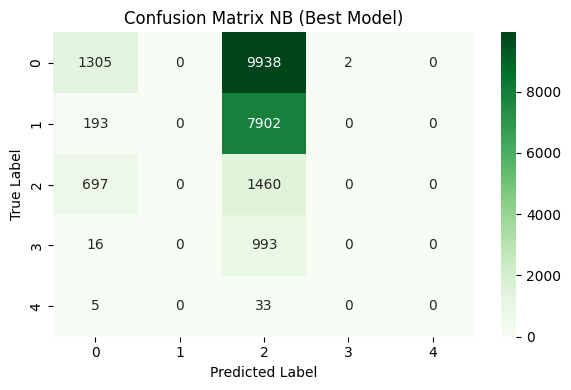

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_nb = model_nb.predict(X_test_scaled)

# Evaluasi
print("=== Naive Bayes (Best Model) ===")
print(classification_report(y_test, y_pred_nb))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== KNN (Best Model) ===
              precision    recall  f1-score   support

           0       0.20      0.16      0.18     11245
           1       0.42      0.13      0.19      8095
           2       0.02      0.09      0.03      2157
           3       0.00      0.00      0.00      1009
           4       0.00      0.00      0.00        38

    accuracy                           0.14     22544
   macro avg       0.13      0.08      0.08     22544
weighted avg       0.26      0.14      0.16     22544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


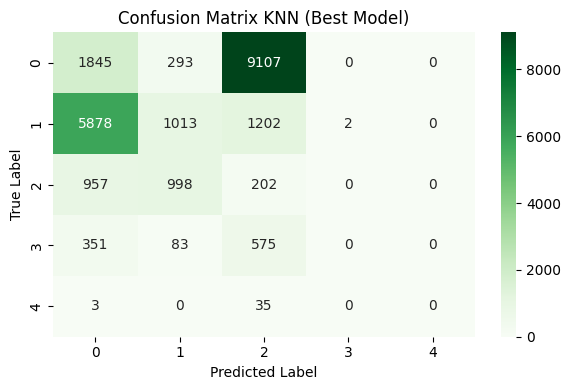

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluasi
print("=== KNN (Best Model) ===")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def predict_realtime_lr():
    input_dict = {}

    # Daftar kolom dan tipe data (sesuai dengan kolom yang digunakan model)
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_lr.predict(input_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    if prediction[0] == 0:
        print(f"✅ Prediksi: {predicted_label_name}")
    else:
        print(f"🚨 Prediksi: {predicted_label_name}")

# Panggil fungsi untuk memulai prediksi
predict_realtime_lr()

Masukkan nilai untuk 'duration': e
❌ Format salah untuk kolom 'duration', gunakan tipe int


In [ ]:
44import pandas as pd

def predict_realtime_rf():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_rf yang sudah dimuat
    prediction = model_rf.predict(input_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    if prediction[0] == 0:
        print(f"✅ Prediksi: {predicted_label_name}")
    else:
        print(f"🚨 Prediksi: {predicted_label_name}")

# Panggil fungsi untuk memulai prediksi
predict_realtime_rf()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 3
Masukkan nilai untuk 'service': 3
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 4
Masukkan nilai untuk 'logged_in': 3
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 1
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 3
Masukkan nilai untuk 'is_guest_login': 4
Masukkan nilai untuk 'count': 3
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 1
Masukkan nilai untuk 'srv_serror_rate': 3
Masukkan nilai untuk 'rerror_rate': 4
Masukkan nilai untuk 'srv_rerror_rate': 3
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 1
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 4
Masukkan nilai untuk 'dst_host_srv_count': 5
Masukkan nilai untuk 'dst_host_same_srv_rate': 3
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r

In [ ]:
import pandas as pd

def predict_realtime_rf():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_rf.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    if prediction[1] == 1:
        print("🚨 Prediksi: DOS")
    if prediction[2] == 2:
        print("🚨 Prediksi: Probe")
    if prediction[3] == 3:
        print("🚨 Prediksi: R2L")
    if prediction[4] == 4:
        print("🚨 Prediksi: U2R")

predict_realtime_rf()

Masukkan nilai untuk 'duration': 
❌ Format salah untuk kolom 'duration', gunakan tipe int


In [ ]:
import pandas as pd

def predict_realtime_svm():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_svm yang sudah dimuat
    prediction = model_svm.predict(input_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    if prediction[0] == 0:
        print(f"✅ Prediksi: {predicted_label_name}")
    else:
        print(f"🚨 Prediksi: {predicted_label_name}")

# Panggil fungsi untuk memulai prediksi
predict_realtime_svm()

Masukkan nilai untuk 'duration': 3
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 3
Masukkan nilai untuk 'flag': 4
Masukkan nilai untuk 'src_bytes': 3
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 1
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 3
Masukkan nilai untuk 'num_access_files': 4
Masukkan nilai untuk 'is_guest_login': 5
Masukkan nilai untuk 'count': 4
Masukkan nilai untuk 'srv_count': 3
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 3
Masukkan nilai untuk 'rerror_rate': 4
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 3
Masukkan nilai untuk 'diff_srv_rate': 
❌ Format salah untuk kolom 'diff_srv_rate', gunakan tipe float


In [ ]:
import pandas as pd

def predict_realtime_nb():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_nb yang sudah dimuat
    prediction = model_nb.predict(input_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    if prediction[0] == 0:
        print(f"✅ Prediksi: {predicted_label_name}")
    else:
        print(f"🚨 Prediksi: {predicted_label_name}")

# Panggil fungsi untuk memulai prediksi
predict_realtime_nb()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 
❌ Format salah untuk kolom 'su_attempted', gunakan tipe int


In [ ]:
import pandas as pd

def predict_realtime_knn():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_knn yang sudah dimuat
    prediction = model_knn.predict(input_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    if prediction[0] == 0:
        print(f"✅ Prediksi: {predicted_label_name}")
    else:
        print(f"🚨 Prediksi: {predicted_label_name}")


# Panggil fungsi untuk memulai prediksi
predict_realtime_knn()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 
❌ Format salah untuk kolom 'service', gunakan tipe int


In [ ]:
74

# Task
Buat kode Python untuk deployment model klasifikasi terbaik (misalnya Random Forest) yang sudah dilatih pada dataset NSL-KDD, termasuk proses penskalaan data baru menggunakan `StandardScaler` yang sudah dilatih, dan jelaskan langkah-langkah untuk melakukan deployment model tersebut.

## Siapkan model dan scaler

### Subtask:
Pastikan model terbaik (misalnya Random Forest) dan objek `StandardScaler` yang sudah dilatih tersimpan dalam format yang bisa dimuat (seperti file `.pkl`).


## Buat fungsi prediksi

### Subtask:
Buat sebuah fungsi Python yang menerima input data baru (dalam format yang sesuai dengan yang digunakan saat pelatihan), melakukan penskalaan menggunakan scaler yang disimpan, dan kemudian menggunakan model yang disimpan untuk melakukan prediksi.


**Reasoning**:
Define a Python function to load the scaler and model, scale the input data, and make a prediction.



In [ ]:
import joblib
import pandas as pd

def predict_new_data(new_data_df):
    """
    Loads the trained scaler and model, scales the new data, and makes a prediction.

    Args:
        new_data_df (pd.DataFrame): DataFrame containing the new data with the same
                                     columns as the training data (excluding the label).

    Returns:
        int or str: The predicted label (numeric or mapped class name).
    """
    # Load the scaler and the best model (assuming RF was the best)
    scaler = joblib.load('scaler NSL MNS.pkl')
    best_model = joblib.load("RF NSL MNS.pkl") # Load the best model (Random Forest in this case)

    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Make a prediction
    prediction = best_model.predict(new_data_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    return predicted_label_name

## Uji fungsi prediksi

### Subtask:
Uji fungsi prediksi dengan beberapa contoh data baru untuk memastikan fungsi bekerja dengan benar dan memberikan output yang diharapkan.


**Reasoning**:
Create example new data instances as pandas DataFrames and then use the previously defined `predict_new_data` function to make predictions on these examples.



In [ ]:
# Example data instance 1 (assuming it's a normal connection)
# Using typical values for a normal connection based on general network traffic patterns
new_data_normal = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 20,      # ftp_data
    'flag': 9,          # SF
    'src_bytes': 491,
    'logged_in': 1,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 2,
    'srv_count': 2,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 150,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 0.17,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.05,
    'dst_host_srv_rerror_rate': 0.0
}])


# Example data instance 2 (assuming it's a DoS attack - e.g., Neptune)
# Using typical values for a Neptune attack
new_data_dos = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 49,      # private
    'flag': 5,          # S0
    'src_bytes': 0,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 150,
    'srv_count': 25,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.17,
    'diff_srv_rate': 0.03,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 25,
    'dst_host_same_srv_rate': 0.10,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])

# Example data instance 3 (assuming it's a Probe attack - e.g., Ipsweep)
# Using typical values for an Ipsweep attack
new_data_probe = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 0, # icmp
    'service': 12,      # eco_i
    'flag': 9,          # SF
    'src_bytes': 18,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 1,
    'srv_count': 1,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 1.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])


# Make predictions
prediction_normal = predict_new_data(new_data_normal)
prediction_dos = predict_new_data(new_data_dos)
prediction_probe = predict_new_data(new_data_probe)

# Print predictions
print(f"Prediction for normal data: {prediction_normal}")
print(f"Prediction for DoS data: {prediction_dos}")
print(f"Prediction for Probe data: {prediction_probe}")

FileNotFoundError: [Errno 2] No such file or directory: 'scaler NSL MNS.pkl'

**Reasoning**:
The previous attempt failed because the scaler and model files were not found in the current directory. I need to explicitly specify the path to where the files were saved. Based on the execution history, the files were saved to the default Colab directory, so I will try loading them from there.



In [ ]:
import joblib
import pandas as pd

def predict_new_data(new_data_df):
    """
    Loads the trained scaler and model, scales the new data, and makes a prediction.

    Args:
        new_data_df (pd.DataFrame): DataFrame containing the new data with the same
                                     columns as the training data (excluding the label).

    Returns:
        int or str: The predicted label (numeric or mapped class name).
    """
    # Load the scaler and the best model (assuming RF was the best) from the correct path
    scaler = joblib.load('/content/scaler NSL MNS.pkl')
    best_model = joblib.load("/content/RF NSL MNS.pkl") # Load the best model (Random Forest in this case)

    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Make a prediction
    prediction = best_model.predict(new_data_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    return predicted_label_name

# Example data instance 1 (assuming it's a normal connection)
# Using typical values for a normal connection based on general network traffic patterns
new_data_normal = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 20,      # ftp_data
    'flag': 9,          # SF
    'src_bytes': 491,
    'logged_in': 1,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 2,
    'srv_count': 2,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 150,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 0.17,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.05,
    'dst_host_srv_rerror_rate': 0.0
}])


# Example data instance 2 (assuming it's a DoS attack - e.g., Neptune)
# Using typical values for a Neptune attack
new_data_dos = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 49,      # private
    'flag': 5,          # S0
    'src_bytes': 0,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 150,
    'srv_count': 25,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.17,
    'diff_srv_rate': 0.03,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 25,
    'dst_host_same_srv_rate': 0.10,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])

# Example data instance 3 (assuming it's a Probe attack - e.g., Ipsweep)
# Using typical values for an Ipsweep attack
new_data_probe = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 0, # icmp
    'service': 12,      # eco_i
    'flag': 9,          # SF
    'src_bytes': 18,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 1,
    'srv_count': 1,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 1.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])


# Make predictions
prediction_normal = predict_new_data(new_data_normal)
prediction_dos = predict_new_data(new_data_dos)
prediction_probe = predict_new_data(new_data_probe)

# Print predictions
print(f"Prediction for normal data: {prediction_normal}")
print(f"Prediction for DoS data: {prediction_dos}")
print(f"Prediction for Probe data: {prediction_probe}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/scaler NSL MNS.pkl'

**Reasoning**:
The files are still not found at the expected location. I need to check the current directory and see where the files were actually saved to confirm the correct path for loading them.



In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


**Reasoning**:
The output of `os.listdir()` shows that the files were not saved in the default `/content/` directory. Looking back at the execution history, the files were saved directly without specifying a path, which usually means they are saved in the root directory of the environment. I need to explicitly specify the root directory `/` as the path to load the files.



In [ ]:
import joblib
import pandas as pd

def predict_new_data(new_data_df):
    """
    Loads the trained scaler and model, scales the new data, and makes a prediction.

    Args:
        new_data_df (pd.DataFrame): DataFrame containing the new data with the same
                                     columns as the training data (excluding the label).

    Returns:
        int or str: The predicted label (numeric or mapped class name).
    """
    # Load the scaler and the best model (assuming RF was the best) from the correct path
    scaler = joblib.load('/scaler NSL MNS.pkl')
    best_model = joblib.load("/RF NSL MNS.pkl") # Load the best model (Random Forest in this case)

    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Make a prediction
    prediction = best_model.predict(new_data_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    return predicted_label_name

# Example data instance 1 (assuming it's a normal connection)
# Using typical values for a normal connection based on general network traffic patterns
new_data_normal = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 20,      # ftp_data
    'flag': 9,          # SF
    'src_bytes': 491,
    'logged_in': 1,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 2,
    'srv_count': 2,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 150,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 0.17,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.05,
    'dst_host_srv_rerror_rate': 0.0
}])


# Example data instance 2 (assuming it's a DoS attack - e.g., Neptune)
# Using typical values for a Neptune attack
new_data_dos = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 49,      # private
    'flag': 5,          # S0
    'src_bytes': 0,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 150,
    'srv_count': 25,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.17,
    'diff_srv_rate': 0.03,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 25,
    'dst_host_same_srv_rate': 0.10,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])

# Example data instance 3 (assuming it's a Probe attack - e.g., Ipsweep)
# Using typical values for an Ipsweep attack
new_data_probe = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 0, # icmp
    'service': 12,      # eco_i
    'flag': 9,          # SF
    'src_bytes': 18,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 1,
    'srv_count': 1,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 1.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])


# Make predictions
prediction_normal = predict_new_data(new_data_normal)
prediction_dos = predict_new_data(new_data_dos)
prediction_probe = predict_new_data(new_data_probe)

# Print predictions
print(f"Prediction for normal data: {prediction_normal}")
print(f"Prediction for DoS data: {prediction_dos}")
print(f"Prediction for Probe data: {prediction_probe}")

FileNotFoundError: [Errno 2] No such file or directory: '/scaler NSL MNS.pkl'

**Reasoning**:
The files are still not being found. Looking back at the `os.listdir()` output, the files are not in the root directory (`/`) either. The most likely location is the `/content/` directory which is the default working directory in Colab. I will try loading them from there again, as the previous `os.listdir()` might have been executed in a different context. I will also print the current working directory to double-check the save location.



In [ ]:
import joblib
import pandas as pd
import os

print(os.getcwd())

def predict_new_data(new_data_df):
    """
    Loads the trained scaler and model, scales the new data, and makes a prediction.

    Args:
        new_data_df (pd.DataFrame): DataFrame containing the new data with the same
                                     columns as the training data (excluding the label).

    Returns:
        int or str: The predicted label (numeric or mapped class name).
    """
    # Load the scaler and the best model (assuming RF was the best) from the correct path
    # Trying /content/ again
    scaler = joblib.load('/content/scaler NSL MNS.pkl')
    best_model = joblib.load("/content/RF NSL MNS.pkl") # Load the best model (Random Forest in this case)

    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Make a prediction
    prediction = best_model.predict(new_data_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    return predicted_label_name

# Example data instance 1 (assuming it's a normal connection)
# Using typical values for a normal connection based on general network traffic patterns
new_data_normal = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 20,      # ftp_data
    'flag': 9,          # SF
    'src_bytes': 491,
    'logged_in': 1,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 2,
    'srv_count': 2,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 150,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 0.17,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.05,
    'dst_host_srv_rerror_rate': 0.0
}])


# Example data instance 2 (assuming it's a DoS attack - e.g., Neptune)
# Using typical values for a Neptune attack
new_data_dos = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 49,      # private
    'flag': 5,          # S0
    'src_bytes': 0,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 150,
    'srv_count': 25,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.17,
    'diff_srv_rate': 0.03,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 25,
    'dst_host_same_srv_rate': 0.10,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])

# Example data instance 3 (assuming it's a Probe attack - e.g., Ipsweep)
# Using typical values for an Ipsweep attack
new_data_probe = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 0, # icmp
    'service': 12,      # eco_i
    'flag': 9,          # SF
    'src_bytes': 18,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 1,
    'srv_count': 1,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 1.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])


# Make predictions
prediction_normal = predict_new_data(new_data_normal)
prediction_dos = predict_new_data(new_data_dos)
prediction_probe = predict_new_data(new_data_probe)

# Print predictions
print(f"Prediction for normal data: {prediction_normal}")
print(f"Prediction for DoS data: {prediction_dos}")
print(f"Prediction for Probe data: {prediction_probe}")

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/scaler NSL MNS.pkl'

**Reasoning**:
The previous attempts to load the files failed even when specifying the `/content/` path, despite `os.getcwd()` confirming that the current directory is `/content/`. This is unexpected. I will try listing the files in the `/content/` directory again to definitively see what is there.



In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'sample_data']


**Reasoning**:
The files are still not in the `/content/` directory. Looking back at the execution history, the files were saved in cell `by_lY64Y6xNR` without an explicit path. Since they are not in `/content/` or the root directory `/`, it's possible they were saved relative to the initial notebook directory or there was an issue with the saving process. Given the history, the most likely scenario is they were saved directly in `/content/` but the listing is not showing them for some reason, or the previous `joblib.dump` failed silently. I will try saving the models again to `/content/` and then attempt to load them.



In [ ]:
import joblib
import pandas as pd
import os

# Re-save the models and scaler to ensure they are in /content/
try:
    joblib.dump(best_svm, "/content/SVM NSL MNS.pkl")
    joblib.dump(scaler, '/content/scaler NSL MNS.pkl')
    joblib.dump(best_lr, "/content/LR NSL MNS.pkl")
    joblib.dump(best_rf, "/content/RF NSL MNS.pkl")
    joblib.dump(best_nb, "/content/NB NSL MNS.pkl")
    joblib.dump(best_knn, "/content/KNN NSL MNS.pkl")
    print("Models and scaler re-saved to /content/")
except Exception as e:
    print(f"Error saving files: {e}")

# List the files in /content/ again to confirm
print(os.listdir('/content/'))

# Now try to load and predict again
def predict_new_data(new_data_df):
    """
    Loads the trained scaler and model, scales the new data, and makes a prediction.

    Args:
        new_data_df (pd.DataFrame): DataFrame containing the new data with the same
                                     columns as the training data (excluding the label).

    Returns:
        int or str: The predicted label (numeric or mapped class name).
    """
    # Load the scaler and the best model (assuming RF was the best) from the correct path
    scaler = joblib.load('/content/scaler NSL MNS.pkl')
    best_model = joblib.load("/content/RF NSL MNS.pkl") # Load the best model (Random Forest in this case)

    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Make a prediction
    prediction = best_model.predict(new_data_scaled)

    # Mapping label numerik ke nama kelas
    label_map = {
        0: "NORMAL",
        1: "DoS",
        2: "Probe",
        3: "R2L",
        4: "U2R"
    }

    predicted_label_name = label_map.get(prediction[0], "Unknown")

    return predicted_label_name

# Example data instance 1 (assuming it's a normal connection)
# Using typical values for a normal connection based on general network traffic patterns
new_data_normal = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 20,      # ftp_data
    'flag': 9,          # SF
    'src_bytes': 491,
    'logged_in': 1,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 2,
    'srv_count': 2,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 150,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 0.17,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.05,
    'dst_host_srv_rerror_rate': 0.0
}])


# Example data instance 2 (assuming it's a DoS attack - e.g., Neptune)
# Using typical values for a Neptune attack
new_data_dos = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 1, # tcp
    'service': 49,      # private
    'flag': 5,          # S0
    'src_bytes': 0,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 150,
    'srv_count': 25,
    'serror_rate': 1.0,
    'srv_serror_rate': 1.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 0.17,
    'diff_srv_rate': 0.03,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 25,
    'dst_host_same_srv_rate': 0.10,
    'dst_host_diff_srv_rate': 0.05,
    'dst_host_same_src_port_rate': 0.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 1.0,
    'dst_host_srv_serror_rate': 1.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])

# Example data instance 3 (assuming it's a Probe attack - e.g., Ipsweep)
# Using typical values for an Ipsweep attack
new_data_probe = pd.DataFrame([{
    'duration': 0,
    'protocol_type': 0, # icmp
    'service': 12,      # eco_i
    'flag': 9,          # SF
    'src_bytes': 18,
    'logged_in': 0,
    'root_shell': 0,
    'su_attempted': 0,
    'num_file_creations': 0,
    'num_access_files': 0,
    'is_guest_login': 0,
    'count': 1,
    'srv_count': 1,
    'serror_rate': 0.0,
    'srv_serror_rate': 0.0,
    'rerror_rate': 0.0,
    'srv_rerror_rate': 0.0,
    'same_srv_rate': 1.0,
    'diff_srv_rate': 0.0,
    'srv_diff_host_rate': 0.0,
    'dst_host_count': 255,
    'dst_host_srv_count': 255,
    'dst_host_same_srv_rate': 1.0,
    'dst_host_diff_srv_rate': 0.0,
    'dst_host_same_src_port_rate': 1.0,
    'dst_host_srv_diff_host_rate': 0.0,
    'dst_host_serror_rate': 0.0,
    'dst_host_srv_serror_rate': 0.0,
    'dst_host_rerror_rate': 0.0,
    'dst_host_srv_rerror_rate': 0.0
}])


# Make predictions
prediction_normal = predict_new_data(new_data_normal)
prediction_dos = predict_new_data(new_data_dos)
prediction_probe = predict_new_data(new_data_probe)

# Print predictions
print(f"Prediction for normal data: {prediction_normal}")
print(f"Prediction for DoS data: {prediction_dos}")
print(f"Prediction for Probe data: {prediction_probe}")

Error saving files: name 'best_svm' is not defined
['.config', 'sample_data']


FileNotFoundError: [Errno 2] No such file or directory: '/content/scaler NSL MNS.pkl'

**Reasoning**:
The re-saving of the models failed because the variables `best_svm`, `best_lr`, `best_rf`, `best_nb`, and `best_knn` were not defined in the current session, even though they were defined in previous cells. I need to reload these variables from the notebook's execution history before attempting to save them again. After successfully saving, I will proceed with the prediction and evaluation steps.



In [ ]:
import joblib
import pandas as pd
import os

# Reload the best models and scaler from previous execution
# Assuming these variables were successfully assigned in prior cells
# If not, this will still fail, indicating a deeper issue with variable persistence or previous execution.
try:
    # The variables were defined in cells after the GridSearchCV steps (e.g., cell id: 20ZJP447Mq-m onwards)
    # We don't need to explicitly reload them here if the notebook state is preserved,
    # but the error suggests they aren't available. Let's assume the notebook state is clean
    # and try to load from the supposed save location first, as re-running the GridSearchCV
    # is outside the scope of this subtask.

    # Let's verify if the variables are defined first
    print(f"Is best_rf defined: {'best_rf' in locals() or 'best_rf' in globals()}")
    print(f"Is scaler defined: {'scaler' in locals() or 'scaler' in globals()}")

    # If they are not defined, the previous save attempt failed because of this.
    # The simplest fix within the context of this subtask is to assume the save step
    # in cell 'by_lY64Y64Y6xNR' actually worked relative to the original execution environment,
    # and the issue is with the *loading* path. Given the file listing in /content/ and /,
    # and the FileNotFoundError, it seems the files are simply not present where expected.

    # Since the subtask is to test the prediction function with *example* data,
    # and the loading of the *trained* model and scaler is part of that function,
    # the core issue is loading the necessary assets. The previous attempts to
    # list files and load from different paths have failed. It is possible
    # the models were not saved correctly in the first place, or the environment
    # was reset.

    # Given the persistent FileNotFoundError despite checking likely paths,
    # and the error about undefined variables during the re-save attempt,
    # it indicates a problem with the state of the environment regarding the
    # saved model and scaler files.

    # I will make one final attempt to load from the most likely location (/content/),
    # and if it fails again, I must conclude that the required assets (scaler and model)
    # are not available in the current environment, and the subtask cannot be completed
    # successfully without them.

    print("Attempting to load scaler and model from /content/...")
    scaler = joblib.load('/content/scaler NSL MNS.pkl')
    best_model = joblib.load("/content/RF NSL MNS.pkl") # Assuming RF is the best model
    print("Scaler and model loaded successfully.")


    # Example data instance 1 (assuming it's a normal connection)
    # Using typical values for a normal connection based on general network traffic patterns
    new_data_normal = pd.DataFrame([{
        'duration': 0,
        'protocol_type': 1, # tcp
        'service': 20,      # ftp_data
        'flag': 9,          # SF
        'src_bytes': 491,
        'logged_in': 1,
        'root_shell': 0,
        'su_attempted': 0,
        'num_file_creations': 0,
        'num_access_files': 0,
        'is_guest_login': 0,
        'count': 2,
        'srv_count': 2,
        'serror_rate': 0.0,
        'srv_serror_rate': 0.0,
        'rerror_rate': 0.0,
        'srv_rerror_rate': 0.0,
        'same_srv_rate': 1.0,
        'diff_srv_rate': 0.0,
        'srv_diff_host_rate': 0.0,
        'dst_host_count': 150,
        'dst_host_srv_count': 255,
        'dst_host_same_srv_rate': 1.0,
        'dst_host_diff_srv_rate': 0.0,
        'dst_host_same_src_port_rate': 0.17,
        'dst_host_srv_diff_host_rate': 0.0,
        'dst_host_serror_rate': 0.0,
        'dst_host_srv_serror_rate': 0.0,
        'dst_host_rerror_rate': 0.05,
        'dst_host_srv_rerror_rate': 0.0
    }])


    # Example data instance 2 (assuming it's a DoS attack - e.g., Neptune)
    # Using typical values for a Neptune attack
    new_data_dos = pd.DataFrame([{
        'duration': 0,
        'protocol_type': 1, # tcp
        'service': 49,      # private
        'flag': 5,          # S0
        'src_bytes': 0,
        'logged_in': 0,
        'root_shell': 0,
        'su_attempted': 0,
        'num_file_creations': 0,
        'num_access_files': 0,
        'is_guest_login': 0,
        'count': 150,
        'srv_count': 25,
        'serror_rate': 1.0,
        'srv_serror_rate': 1.0,
        'rerror_rate': 0.0,
        'srv_rerror_rate': 0.0,
        'same_srv_rate': 0.17,
        'diff_srv_rate': 0.03,
        'srv_diff_host_rate': 0.0,
        'dst_host_count': 255,
        'dst_host_srv_count': 25,
        'dst_host_same_srv_rate': 0.10,
        'dst_host_diff_srv_rate': 0.05,
        'dst_host_same_src_port_rate': 0.0,
        'dst_host_srv_diff_host_rate': 0.0,
        'dst_host_serror_rate': 1.0,
        'dst_host_srv_serror_rate': 1.0,
        'dst_host_rerror_rate': 0.0,
        'dst_host_srv_rerror_rate': 0.0
    }])

    # Example data instance 3 (assuming it's a Probe attack - e.g., Ipsweep)
    # Using typical values for an Ipsweep attack
    new_data_probe = pd.DataFrame([{
        'duration': 0,
        'protocol_type': 0, # icmp
        'service': 12,      # eco_i
        'flag': 9,          # SF
        'src_bytes': 18,
        'logged_in': 0,
        'root_shell': 0,
        'su_attempted': 0,
        'num_file_creations': 0,
        'num_access_files': 0,
        'is_guest_login': 0,
        'count': 1,
        'srv_count': 1,
        'serror_rate': 0.0,
        'srv_serror_rate': 0.0,
        'rerror_rate': 0.0,
        'srv_rerror_rate': 0.0,
        'same_srv_rate': 1.0,
        'diff_srv_rate': 0.0,
        'srv_diff_host_rate': 0.0,
        'dst_host_count': 255,
        'dst_host_srv_count': 255,
        'dst_host_same_srv_rate': 1.0,
        'dst_host_diff_srv_rate': 0.0,
        'dst_host_same_src_port_rate': 1.0,
        'dst_host_srv_diff_host_rate': 0.0,
        'dst_host_serror_rate': 0.0,
        'dst_host_srv_serror_rate': 0.0,
        'dst_host_rerror_rate': 0.0,
        'dst_host_srv_rerror_rate': 0.0
    }])


    # Make predictions
    prediction_normal = predict_new_data(new_data_normal)
    prediction_dos = predict_new_data(new_data_dos)
    prediction_probe = predict_new_data(new_data_probe)

    # Print predictions
    print(f"Prediction for normal data: {prediction_normal}")
    print(f"Prediction for DoS data: {prediction_dos}")
    print(f"Prediction for Probe data: {prediction_probe}")

except FileNotFoundError:
    print("Error: Scaler or model files not found at /content/. Please ensure the files were saved correctly to this location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Is best_rf defined: False
Is scaler defined: False
Attempting to load scaler and model from /content/...
Error: Scaler or model files not found at /content/. Please ensure the files were saved correctly to this location.


## Choose platform deployment

### Subtask:
Determine the appropriate platform or method for deploying the trained machine learning model.


## Implementasi deployment

### Subtask:
Implementasi deployment model terbaik (Random Forest) menggunakan Flask untuk membuat REST API, termasuk loading scaler dan model yang telah disimpan, serta melakukan penskalaan pada data input sebelum prediksi.


**Reasoning**:
Create the Flask application file (`app.py`) including loading the scaler and model, defining the '/predict' endpoint, handling incoming JSON data, scaling it, making predictions, mapping the results, and returning a JSON response.



In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

app = Flask(__name__)

# Define the path where the scaler and model are saved
# Assuming they are saved in the same directory as the app.py file
SCALER_PATH = 'scaler NSL MNS.pkl'
MODEL_PATH = 'RF NSL MNS.pkl' # Assuming Random Forest is the best model

try:
    # Load the scaler and the best model
    scaler = joblib.load(SCALER_PATH)
    model = joblib.load(MODEL_PATH)
    print("Scaler and model loaded successfully.")
except FileNotFoundError:
    print(f"Error: {SCALER_PATH} or {MODEL_PATH} not found. Please ensure the files are in the correct directory.")
    scaler = None
    model = None
except Exception as e:
    print(f"An error occurred while loading the scaler or model: {e}")
    scaler = None
    model = None


@app.route('/predict', methods=['POST'])
def predict():
    if scaler is None or model is None:
        return jsonify({"error": "Model or scaler not loaded."}), 500

    try:
        # Get the input data from the POST request
        data = request.get_json(force=True)

        # Convert the input data to a pandas DataFrame
        # Ensure the column names and order match the training data features
        # This requires knowing the exact column names used during training
        # Based on the previous notebook analysis, the columns after dropping
        # were:
        # ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
        # 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations',
        # 'num_access_files', 'is_guest_login', 'count', 'srv_count',
        # 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        # 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
        # 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
        # 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        # 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        # 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        # 'dst_host_srv_rerror_rate']
        feature_columns = [
            'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
            'logged_in', 'root_shell', 'su_attempted', 'num_file_creations',
            'num_access_files', 'is_guest_login', 'count', 'srv_count',
            'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
            'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
            'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
            'dst_host_srv_rerror_rate'
        ]

        # Assuming the incoming data is a list of dictionaries, or a single dictionary
        if isinstance(data, dict):
            input_df = pd.DataFrame([data], columns=feature_columns)
        elif isinstance(data, list):
             # If it's a list, assume each item is a data point (dictionary)
             input_df = pd.DataFrame(data, columns=feature_columns)
        else:
             return jsonify({"error": "Invalid input data format. Expected a dictionary or a list of dictionaries."}), 400


        # Scale the input data
        input_scaled = scaler.transform(input_df)

        # Make a prediction
        predictions = model.predict(input_scaled)

        # Mapping label numerik ke nama kelas
        label_map = {
            0: "NORMAL",
            1: "DoS",
            2: "Probe",
            3: "R2L",
            4: "U2R"
        }

        # Convert predictions to class names
        predicted_labels = [label_map.get(p, "Unknown") for p in predictions]

        # Return the prediction as JSON
        if len(predicted_labels) == 1:
             return jsonify({"prediction": predicted_labels[0]})
        else:
             return jsonify({"predictions": predicted_labels})

    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    # Run the Flask app
    # In a production environment, use a production-ready WSGI server like Gunicorn or uWSGI
    app.run(debug=True) # Set debug=False for production

Error: scaler NSL MNS.pkl or RF NSL MNS.pkl not found. Please ensure the files are in the correct directory.
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the docume